# Descriptive Text Mining: a Method Developed by Prof. Gianluca Moro
### Text Mining Module 
### Prof. Gianluca Moro - DISI - Università di Bologna, sede di Cesena
### name.surname@unibo.it


### Script R dell'esercitazione su LSA applicata a NTSB Aviation Accident Database
### Obiettivo: dai rapporti testuali redatti da National Transportation Safety Board che 
### 	descrivono le cause di incidenti aerei, individuare, mediante analisi semantica con LSA,  
### 	le cause che contribuiscono a provocare incidenti destroyed.

### Slide della lezione su LSA 
### https://www.dropbox.com/s/d90gzpxg62hpsl1/L02_1_Riduzione_Dimensionalita_cesena.pdf?dl=0

### Slide di questa esercitazione 
### https://www.dropbox.com/s/ydb0ajj8v1a9qj1/E01_esercitazione-ntsb-lsa.pdf?dl=0

### file dati ntsb-causes.arff in formato arff per l'esercitazione
### https://www.dropbox.com/s/ti5ac6sju66kpdn/ntsb-causes.arff?dl=0

### file dati tdm.table per l'esercitazione in formato R ottenuto dal text processing del file precedente  
### https://www.dropbox.com/s/6zxmk4b3lzqfa5z/tdm.table?dl=0


In [94]:
install.packages("lsa")
install.packages("tm")
install.packages("RWeka")
library(tm)
library(lsa)
library(RWeka)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [95]:
# impostare la directory di lavoro 
# setwd("~/")

# scarica nella dir di lavoro ntsb-causes.arff in cui ogni riga è costituita da due attributi che  
# contengono rispettivamente un doc che descrive le cause dell'incidente aereo e la gravita' 
# dell'incidente: none, minor, substantial, destroyed
# il link dropbox usato di seguito termina con raw=1 per ottenere il file invece della pagina html di risposta di dropbox     
download.file('https://www.dropbox.com/s/ti5ac6sju66kpdn/ntsb-causes.arff?raw=1', 'ntsb-causes.arff') #, method="curl")

# scarica tdm.table, la matrice termini-documenti derivata mediante text processing dal file precedente
# il link dropbox usato di seguito termina con raw=1 per ottenere il file invece della pagina html di risposta di dropbox
download.file('https://www.dropbox.com/s/6zxmk4b3lzqfa5z/tdm.table?raw=1', 'tdm.table') #, method="curl")

# carica in R il primo file
ntsb <- read.arff("ntsb-causes.arff")
write.csv(ntsb, file = "ntsb-causes.csv", col.names = TRUE, row.names = FALSE)

#write.table(x, file = "", append = FALSE, quote = TRUE, sep = " ",
#            eol = "\n", na = "NA", dec = ".", row.names = TRUE,
#            col.names = TRUE, qmethod = c("escape", "double"),
#            fileEncoding = "")

Warning message in write.csv(ntsb, file = "ntsb-causes.csv", col.names = TRUE, row.names = FALSE):
“attempt to set 'col.names' ignored”


In [96]:
head(ntsb)

damage_class
1 Substantial 
2 Substantial 
3 Destroyed   
4 Substantial 
5 Substantial 
6 Minor       
  narr_cause                                                                                                                                                                                                   
1 The pilot failed to maintain directional control of the airplane and the runway selected resulted in a tailwind condition.  Factors associated  with the accident were the gusty crosswind and the snow bank.
2 The pilot's failure to maintain directional control on the runway.  Factors relating to this accident were the aborted takeoff attempt, the pilot's improper in-flight planning/decision, and  the snowbank. 
3 The failure of the student pilot to maintain adequate ground clearance while hovering.                                                                                                                       
4 The failure of the pilot to obtain assistance from the FBO in the form of a marshaller and failure of the pilot to maintain clearance resulting in the on-ground collision with the light pole.              
5 The pilot's failure to maintain a proper glidepath during final approach.  A factor associated with the accident was soft terrain.                                                                           
6 Missing exhaust nozzle bolts for undetermined reasons.  A factor was inadequate maintenance inspection of the affected area.

In [97]:
# salva nel vettore damages la gravita' di ogni incidente (attributo classe) 
damages = ntsb$damage_class; 

#View(damages)
# salva nel vettore causes la descrizione di ogni incidente
causes = ntsb$narr_cause

In [98]:
# importazione della matrice termini-documenti corrispondente ai 3229 rapporti di incidenti aerei,
# redatti dall'organismo internazionale NTSB, presenti nel file ntsb-causes.arff 
tdm <- as.matrix(read.table("tdm.table"))
colnames(tdm) <- 1:3229 # il nome di ogni doc diventa il num. corrispondente alla sua posizione nella matrice
words <- rownames(tdm) # estrazione del vocabolario
# quante sono le parole ?
length(words)

[1] 201

In [99]:
# applicazione del term weighting alla matrice termini-doc
tdmle <- lw_logtf(tdm) * ( 1-entropy(tdm) )  
head(tdmle)

1         2         3        4 5         6 7 8 9 10        ⋯
abort      0.0000000 0.0000000 0.000000 0 0.0000000 0 0 0 0 0.0000000 ⋯
aborted    0.0000000 0.3610511 0.000000 0 0.0000000 0 0 0 0 0.0000000 ⋯
accident   0.1412984 0.1412984 0.000000 0 0.1412984 0 0 0 0 0.1412984 ⋯
action     0.0000000 0.0000000 0.000000 0 0.0000000 0 0 0 0 0.0000000 ⋯
additional 0.0000000 0.0000000 0.000000 0 0.0000000 0 0 0 0 0.0000000 ⋯
adequate   0.0000000 0.0000000 0.268457 0 0.0000000 0 0 0 0 0.0000000 ⋯
           3220     3221 3222 3223 3224      3225 3226      3227     3228     
abort      0.000000 0    0    0    0.0000000 0    0.0000000 0.000000 0.0000000
aborted    0.000000 0    0    0    0.0000000 0    0.0000000 0.000000 0.0000000
accident   0.000000 0    0    0    0.1412984 0    0.1412984 0.000000 0.0000000
action     0.000000 0    0    0    0.0000000 0    0.0000000 0.000000 0.3239173
additional 0.000000 0    0    0    0.0000000 0    0.0000000 0.000000 0.0000000
adequate   0.268457 0    0    0    0.2684570 0    0.0000000 0.268457 0.0000000
           3229
abort      0   
aborted    0   
accident   0   
action     0   
additional 0   
adequate   0

In [100]:
# funzione che calcola la norma di un vettore
norm_vec <- function(x) sqrt(sum(x^2))
# calcola la norma di ogni termine della matrice termini-doc
norma_termini <- apply(tdmle, 1, norm_vec)

# creazione dello spazio LSA con rango scelto automaticamente
lsar <- lsa( tdmle ) 

# quanti autovalori sono stati calcolati ?
length(lsar$sk)

[1] 69

In [101]:
# visualizziamo le tre matrici della scomposizione SVD: U S V^t
# U è chiamata tk (lsar$tk), S è sk (lsar$sk), V^t è dk (lsar$dk)
head(lsar)

$tk
                         [,1]         [,2]          [,3]          [,4]
abort             -0.01894866  0.015465301  0.0157196399 -0.0042718532
aborted           -0.02478902  0.031310561  0.0288298905 -0.0053803832
accident          -0.15685909  0.084829955 -0.0342674891  0.0058485485
action            -0.03737219  0.050357050  0.0251770099  0.0269226736
additional        -0.02704325  0.011099367 -0.0088813989  0.0054824531
adequate          -0.05600702  0.044198865 -0.0477417043 -0.0279449699
adequately        -0.01812165  0.025179597  0.0031285866  0.0045086753
adverse           -0.03164575  0.044298239 -0.1117391594 -0.0159487938
aircraft          -0.11704857  0.082173035  0.0727495651 -0.0207151424
airplane          -0.13388955  0.087782567  0.1278868581  0.0657476798
airplanes         -0.04414630  0.030115327  0.0037047893 -0.0093864954
airport           -0.02648754  0.001511714 -0.0158597722  0.0177855908
airspeed          -0.07801972  0.049713818 -0.0133867404 -0.0690816054
altitude          -0.08408628  0.058046640 -0.1297583741 -0.0898282631
altitudeclearance -0.02233390  0.021041093 -0.0434135300 -0.0169641056
application       -0.02044649  0.007630715 -0.0083366066 -0.0174039829
approach          -0.07631554  0.055850154 -0.0218289444 -0.0327323434
assembly          -0.02401700 -0.008192910  0.0489425562 -0.0082449379
associated        -0.06239008  0.063870259 -0.0096980128  0.0204839760
attain            -0.01969639  0.021721289  0.0067891788 -0.0002277464
attempt           -0.03482434  0.012901356 -0.0058408896  0.0010735318
attempted         -0.03290277  0.026121063  0.0072594537 -0.0116960192
attention         -0.02015293  0.017908905 -0.0079707837 -0.0148471197
bounced           -0.03818872  0.045409496  0.1000241108  0.0499912870
brake             -0.01889229  0.005878006  0.0449862903  0.0021008676
cable             -0.02169567 -0.007458706  0.0280248878 -0.0101730648
carburetor        -0.04758459 -0.031686555 -0.0584784891 -0.0657374687
checklist         -0.01986018 -0.008840354  0.0074128280  0.0205678633
clearance         -0.07005501  0.080406262 -0.1225333876 -0.0708722196
climb             -0.05600159 -0.009182193  0.0050504946 -0.0505601019
collapse          -0.02641047 -0.002990723  0.1037473523 -0.0125974724
collision         -0.11334617  0.058069981 -0.0674600771 -0.0671829989
compensation      -0.04721239  0.092946948  0.0187366151  0.0637152193
condition         -0.06430650  0.055587336 -0.0073568604  0.0093333020
conditions        -0.13827261  0.169558618 -0.2687689724 -0.0211036590
contamination     -0.02649521 -0.046241967 -0.0089317208  0.0567305993
continue          -0.02292639  0.013630070 -0.0418036027  0.0173442848
continued         -0.03173069  0.041719262 -0.1416940355 -0.0223576823
contributing      -0.15854236  0.017583510 -0.0198269491 -0.0629187608
control           -0.14659571  0.146054852  0.1863148544 -0.0368621172
crosswind         -0.06524582  0.114831893  0.0867256193  0.0478097171
cruise            -0.04937353 -0.044204435 -0.0723207797  0.0091950817
cylinder          -0.02452600 -0.039125754  0.0088190527 -0.0323669431
damage            -0.03297511 -0.004606197  0.0516193691  0.0283982857
dark              -0.04375011  0.029659724 -0.1276950919 -0.0052044230
decision          -0.06295429  0.017711623 -0.0559928754  0.0532958692
delay             -0.02395835  0.019115207 -0.0056927461  0.0022238123
delayed           -0.02586507  0.027104812  0.0103992912  0.0124478726
density           -0.02960536  0.029532601 -0.0327496186 -0.0262305844
departure         -0.02251962  0.013302544 -0.0103350910  0.0130000042
descent           -0.06244231  0.008199311 -0.0308482729 -0.0371430742
directional       -0.09776528  0.145266505  0.2195446089  0.0012566927
ditch             -0.03006747  0.017137967  0.0513440944  0.0006344380
diverted          -0.01894799  0.016406493 -0.0107868904 -0.0149931551
dual              -0.02644711  0.023398113  0.0303895707  0.0461487294
due               -0

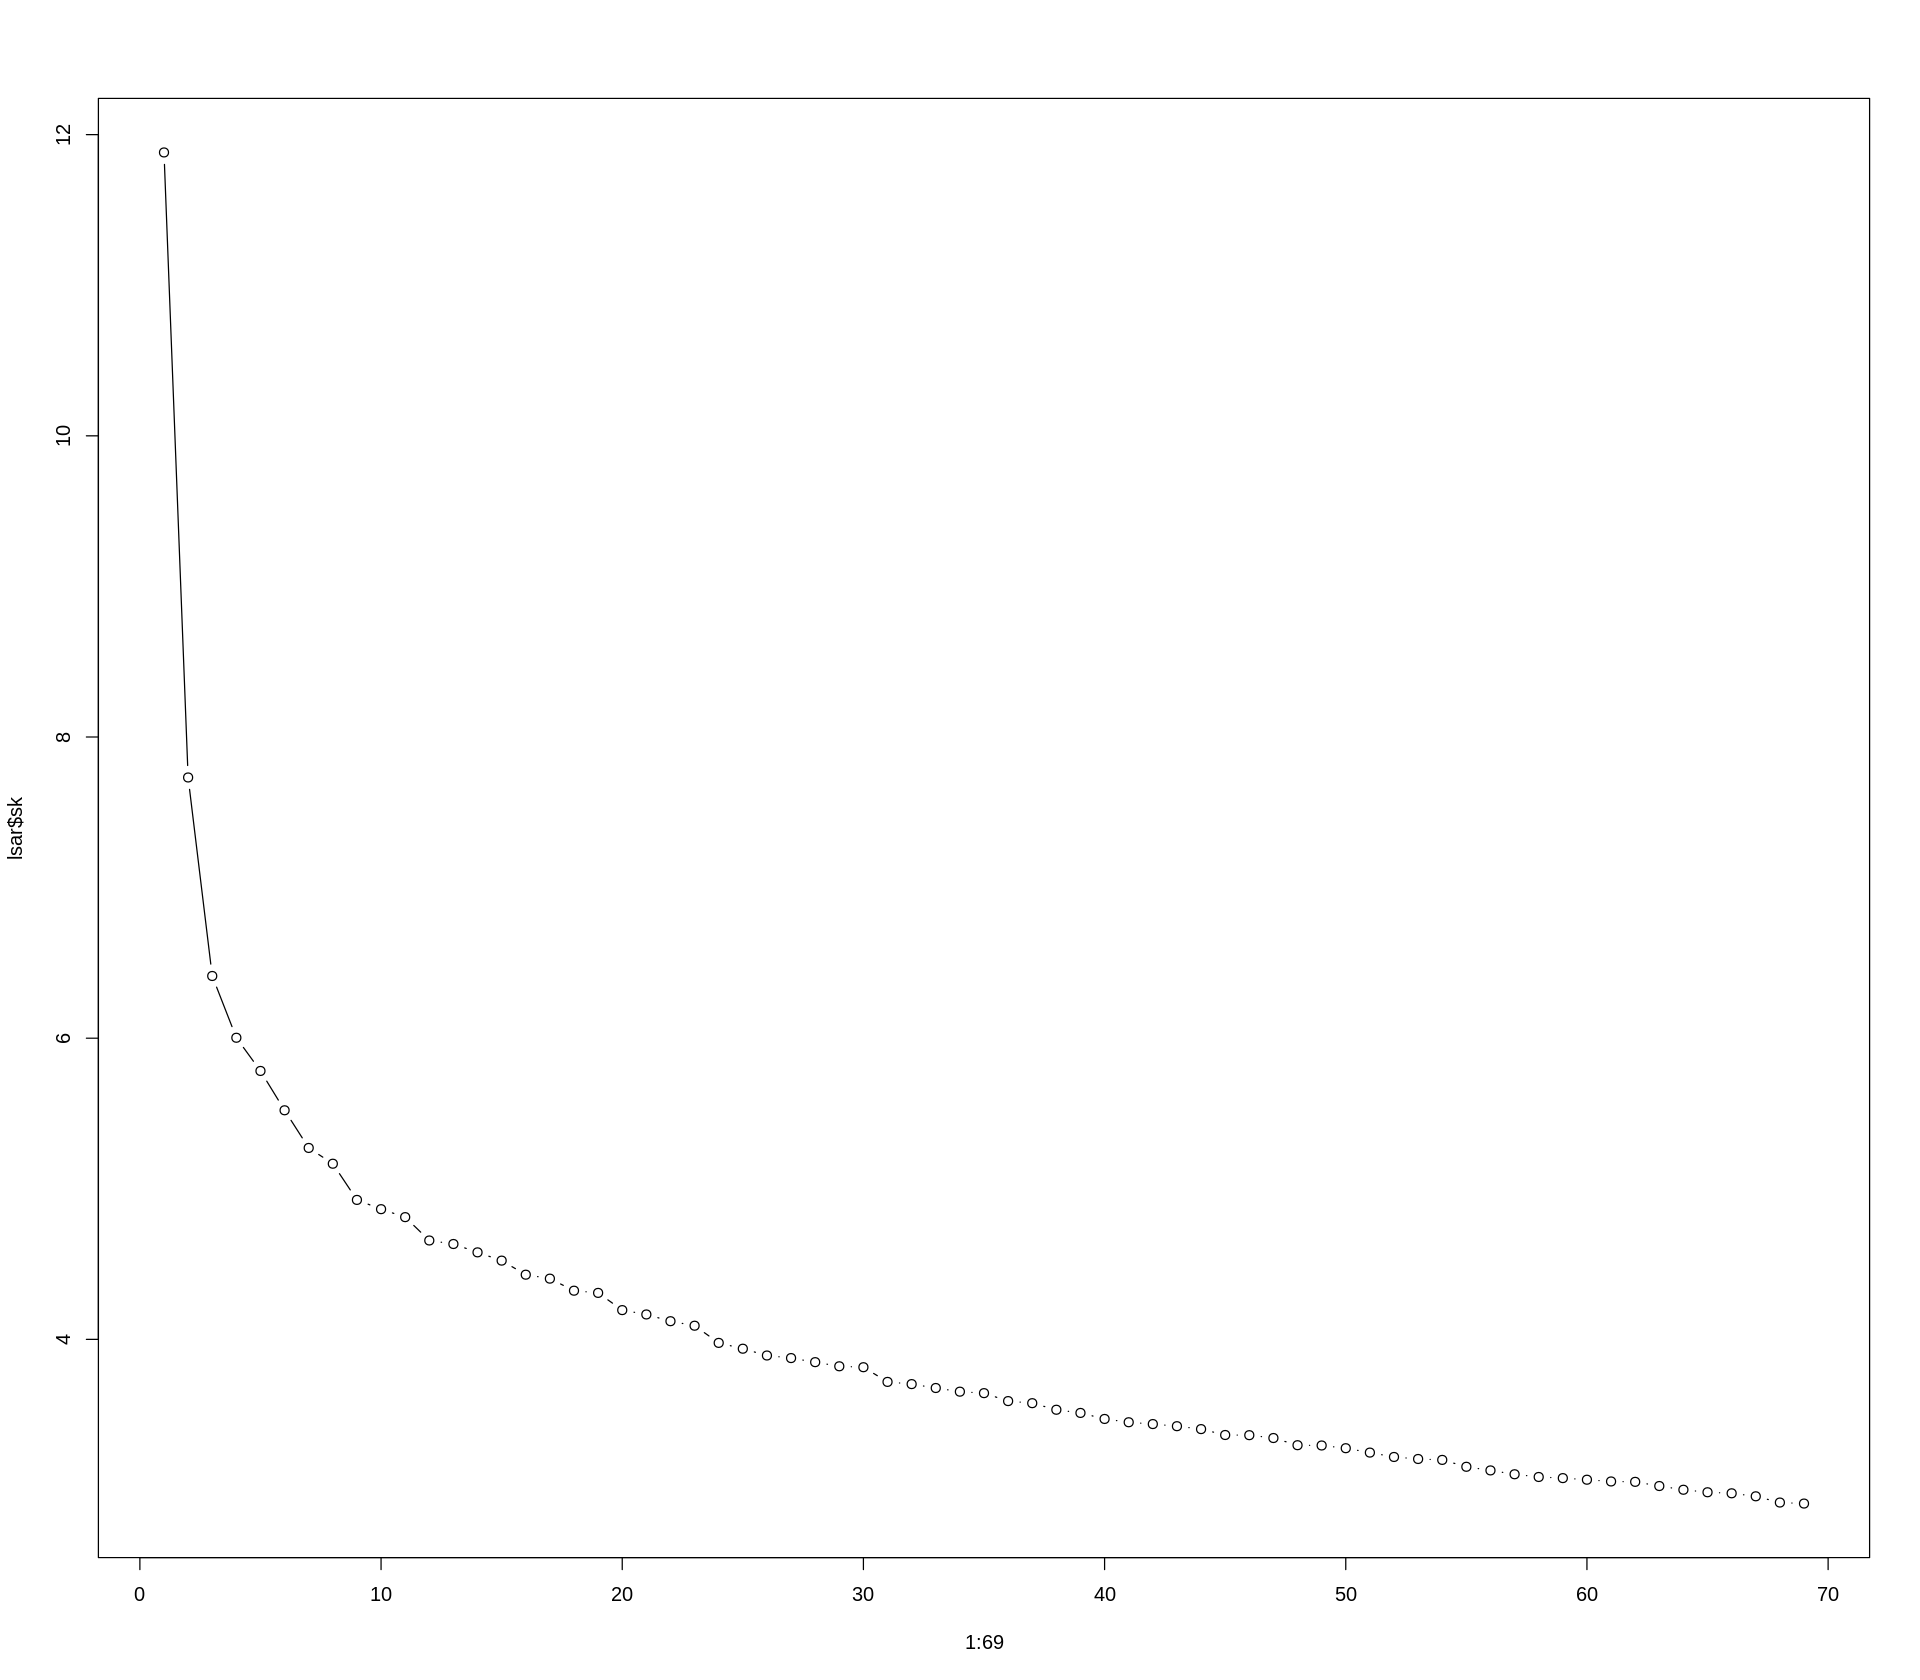

In [102]:
# grafico degli autovalori determinati in LSA mediante scomposizione SVD
plot( 1:69, lsar$sk, type="b" )

In [103]:
# calcolo delle 2 matrici di similarita' semantica pesate rispetto agli autovalori: termini e documenti
tls <- lsar$tk %*% diag( lsar$sk )
dls <- lsar$dk %*% diag( lsar$sk )

In [104]:
# calcola la norma di ogni termine 
norma_termini_lsa <- apply(tls, 1, norm_vec)
# aggiunge la colonna delle norme alla matrice tls
tls_norma_termini = cbind(tls, norma_termini_lsa)

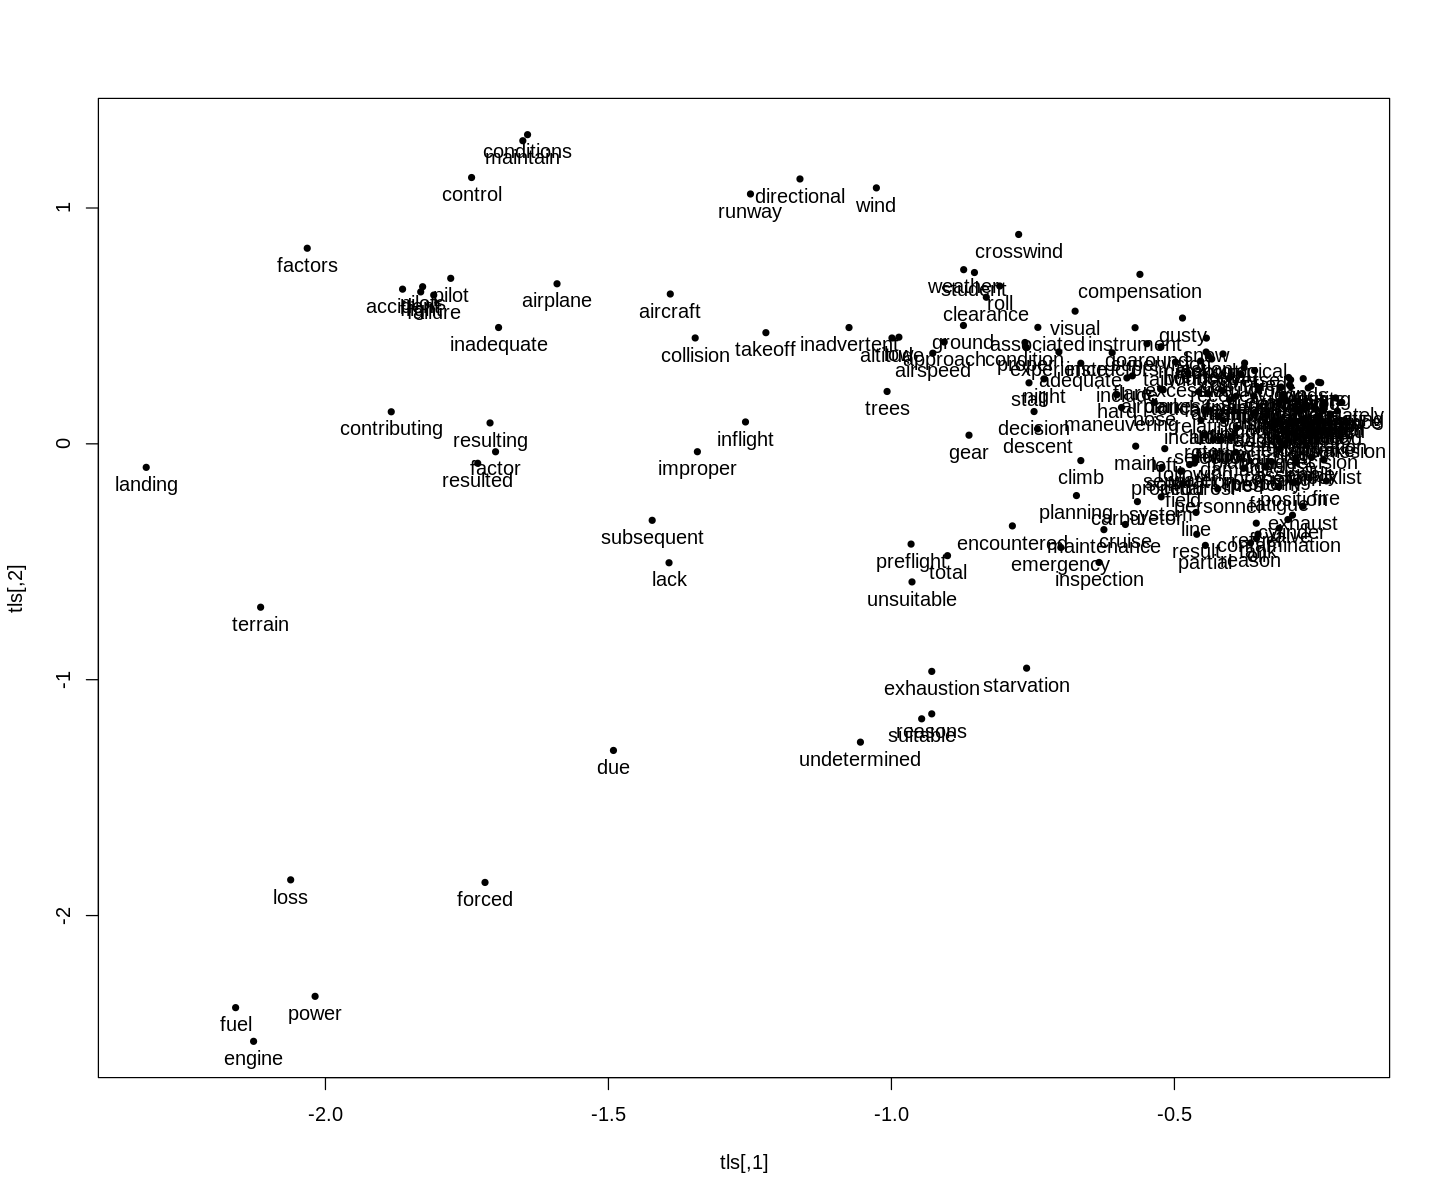

In [105]:
# rappresentazione grafica dei termini e documenti dimensioni latenti 1 e 2
#png("termini-doc.png", width=800, height=700)
options(repr.plot.width=12, repr.plot.height=10)
plot( tls, pch=20 )
text( tls, labels=words, cex=1, pos=1 )
## per salvare e cambiare le dimensioni del grafico scommentare dev.off()
#dev.off()

In [106]:
# subset della matrice dei termini con norma > 1.25 (la colonna 70 e' la norma)
tls_ridotto <- subset(tls_norma_termini, norma_termini_lsa > 1.25)[,-70]

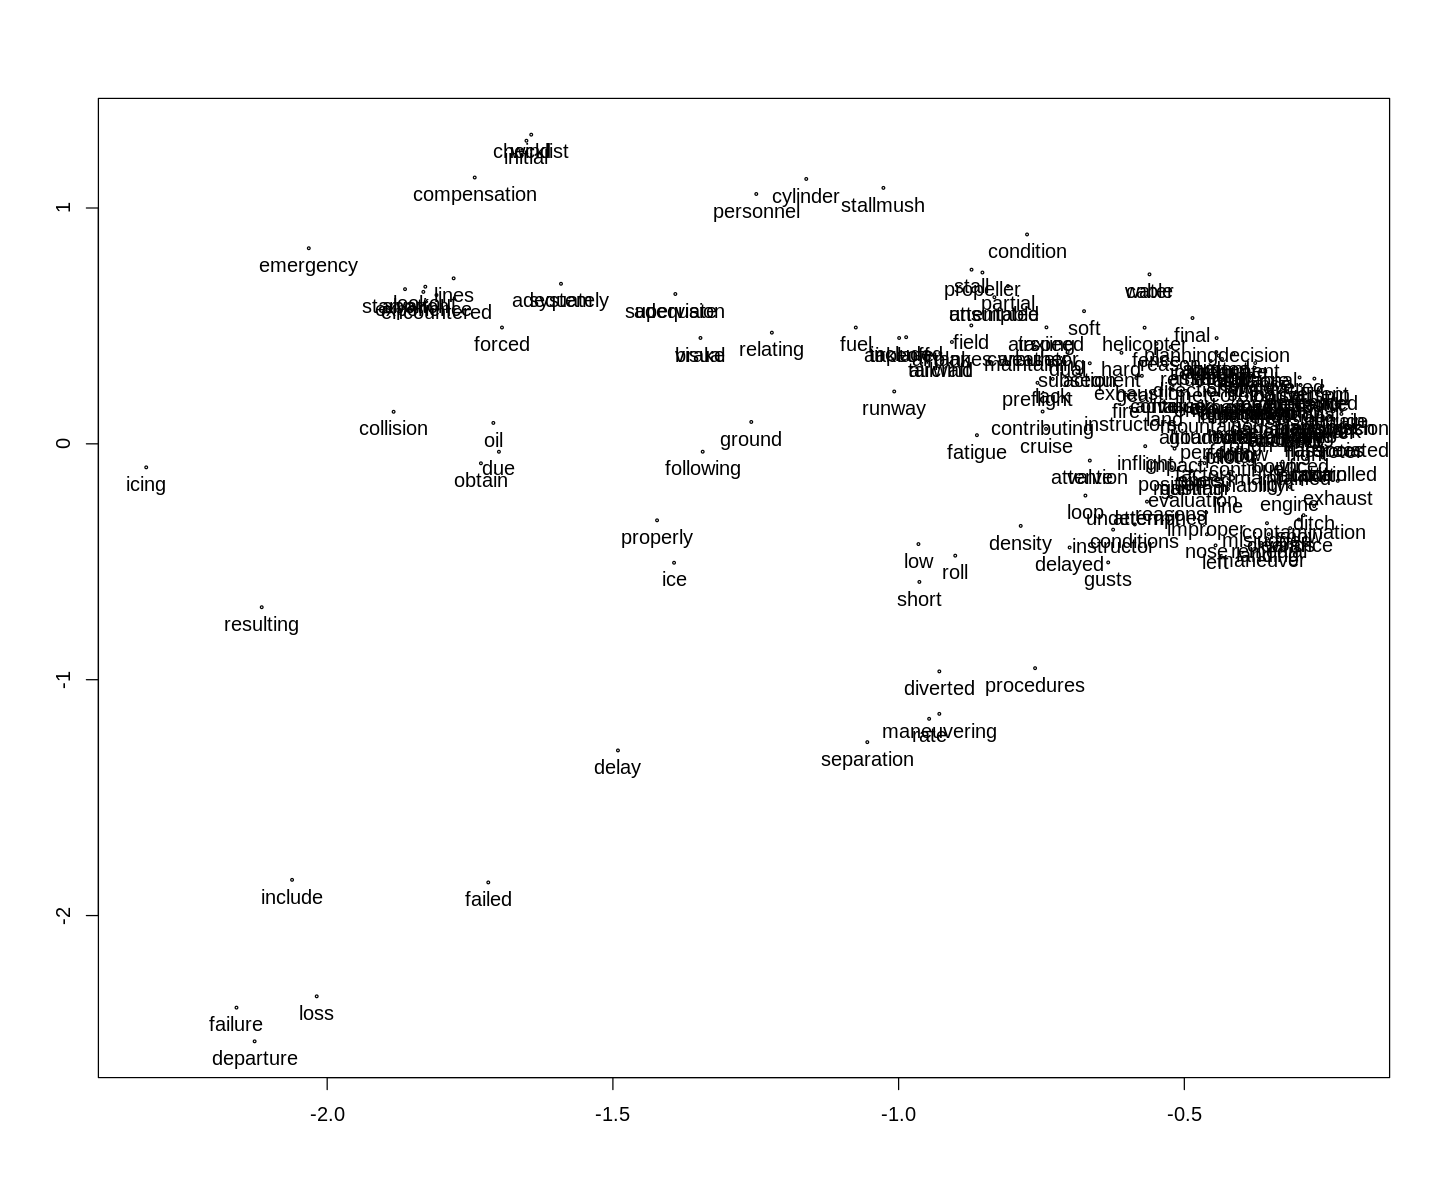

In [107]:
# rappresentazione grafica dei termini ridotti e doc variabili latenti 1 e 2
#png("termini-doc-ridotto.png", width=800, height=700)
options(repr.plot.width=12, repr.plot.height=10)
plot( tls_ridotto, pch=21, cex=0.3 )
text( tls_ridotto, labels=words, cex=1, pos=1 )
#dev.off()

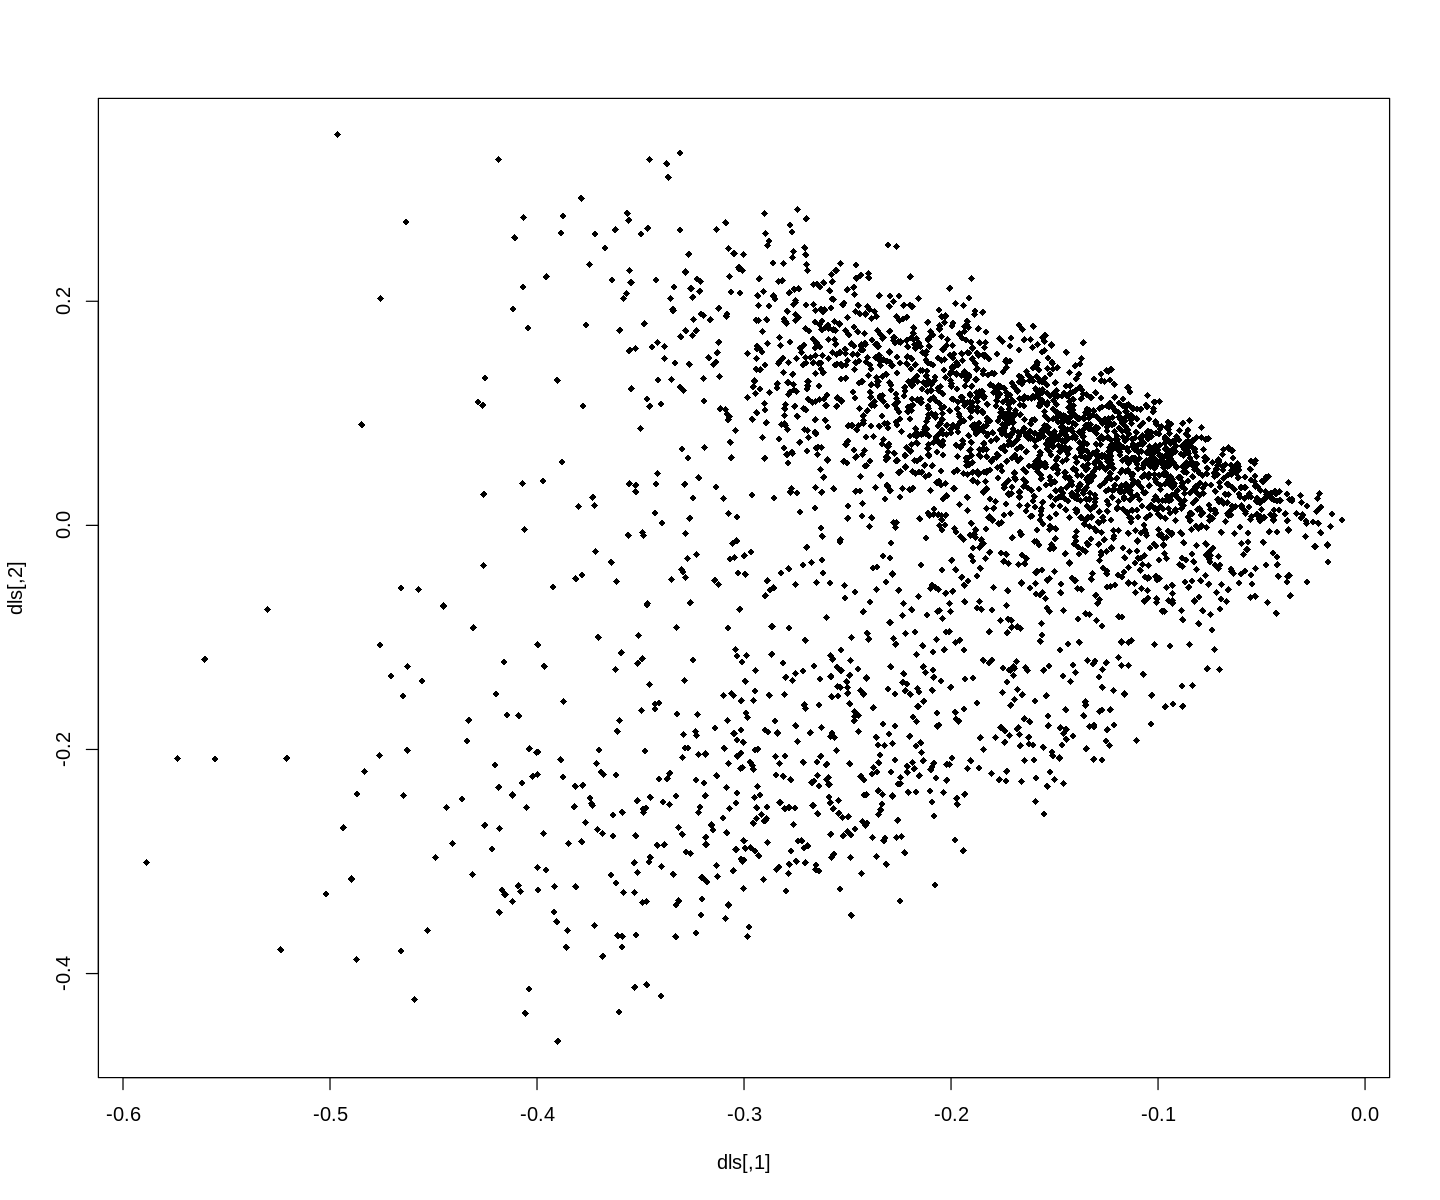

In [108]:
# grafico dei documenti sulle prime due dimensioni latenti
plot( dls, pch=18, cex=0.8 )

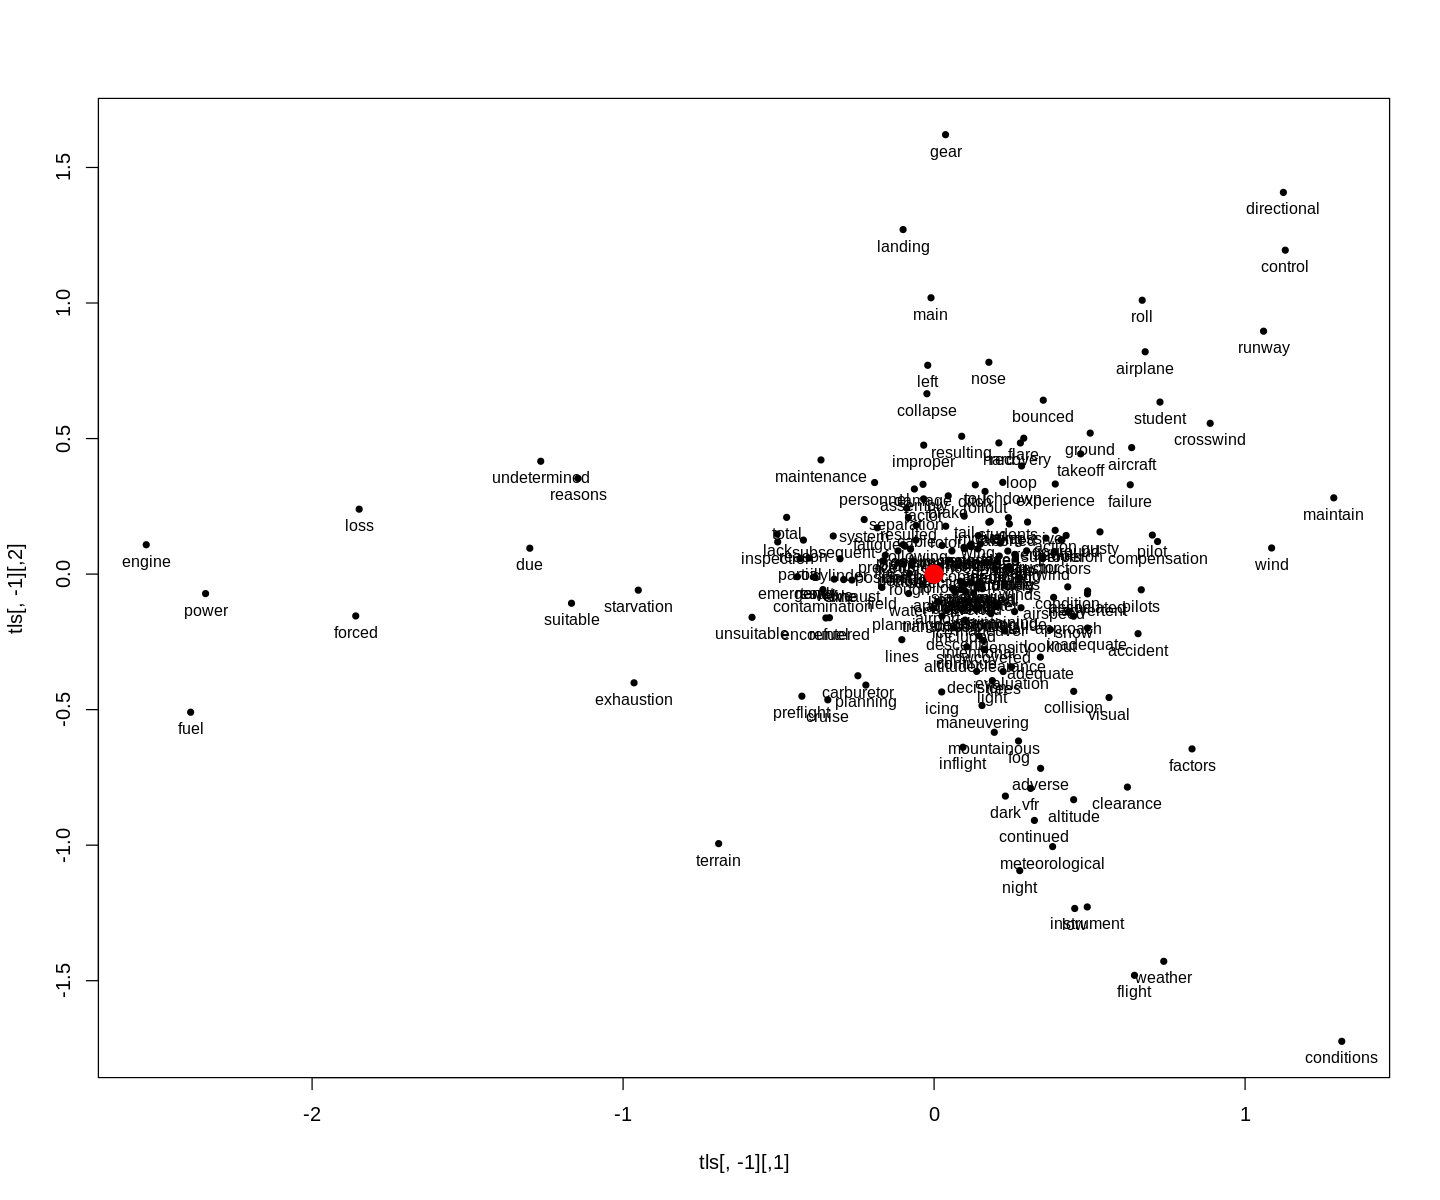

In [109]:
# rappresentazione grafica dei termini e doc variabili latenti 2 e 3
#png("termini-doc-dim-2-3.png", width=800, height=700)
options(repr.plot.width=12, repr.plot.height=10)
plot( tls[,-1], pch=20 ) # -1 elimina la prima variabile latente
text( tls[,-1], labels=words, cex=0.8, pos=1 )
points( 0, 0, pch=20, cex=3, col="red" ) # traccia il punto di origine del piano
#dev.off()

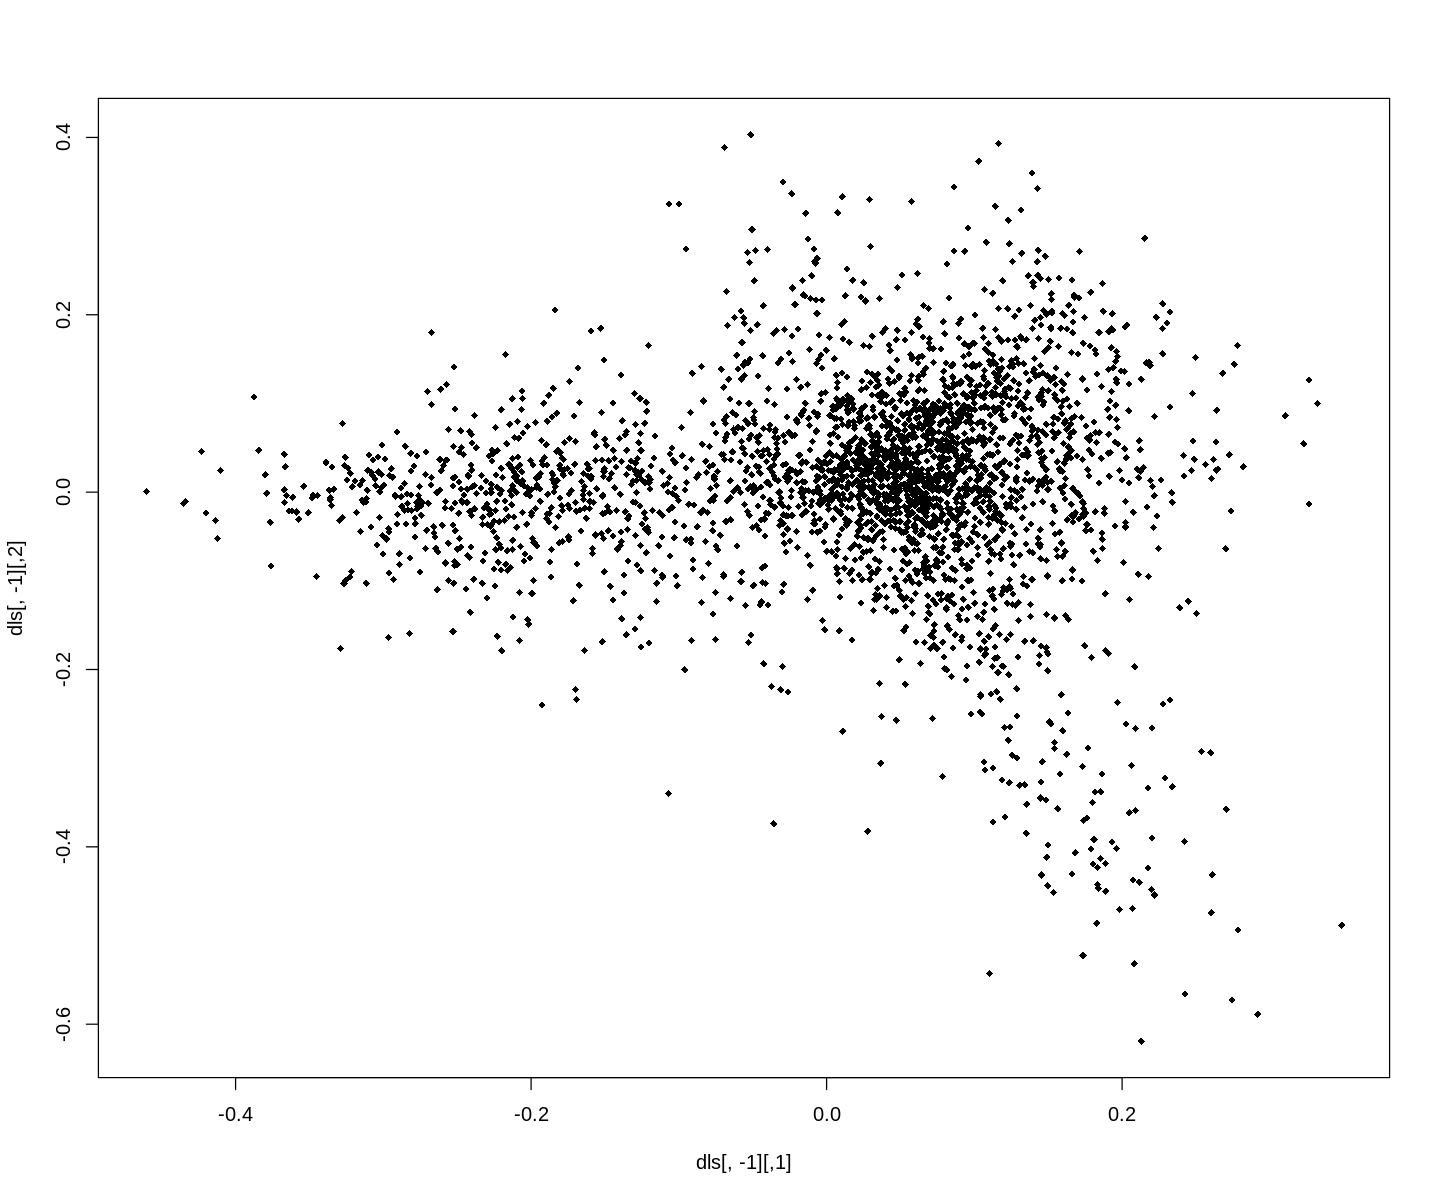

In [110]:
# grafico dei documenti sulla seconda e terza dimensione latente
plot( dls[,-1], pch=18, cex=0.8 )

In [111]:
# libreria per operazioni di attribute and data selection and manipulation, tra cui anche groupby alla sql
install.packages('dplyr')
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [112]:
# conversione dei nomi delle classi in colori per distinguere i rapporti di incidenti nel grafico
damcols = as.vector(recode(damages, Destroyed = "red", Minor = "blue",  None = "green", Substantial = "gold3") )
head(damcols)
head(damages)

[1] "gold3" "gold3" "red"   "gold3" "gold3" "blue"

[1] Substantial Substantial Destroyed   Substantial Substantial Minor      
Levels: Destroyed Minor None Substantial

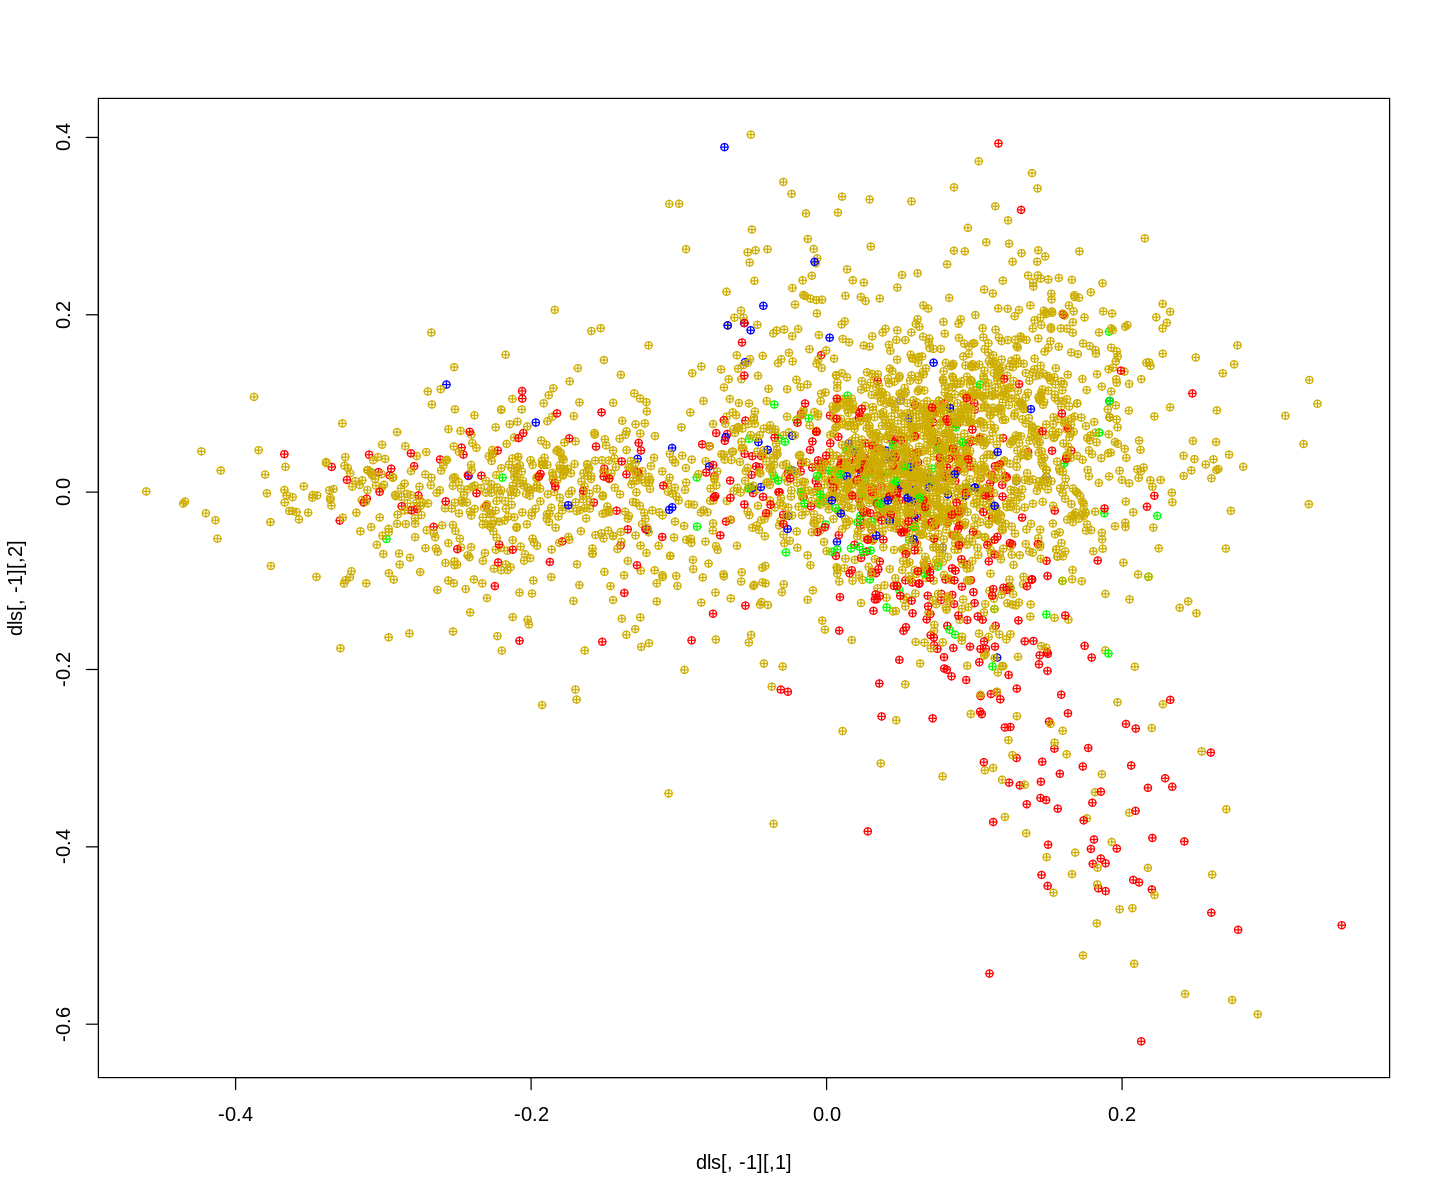

In [113]:
#png("test.png", width     = 2.25, height    = 2.25, units     = "in", res       = 300,pointsize = 1)
options(repr.plot.width=12, repr.plot.height=10)
plot( dls[,-1], pch=10, cex=0.8, col=damcols)

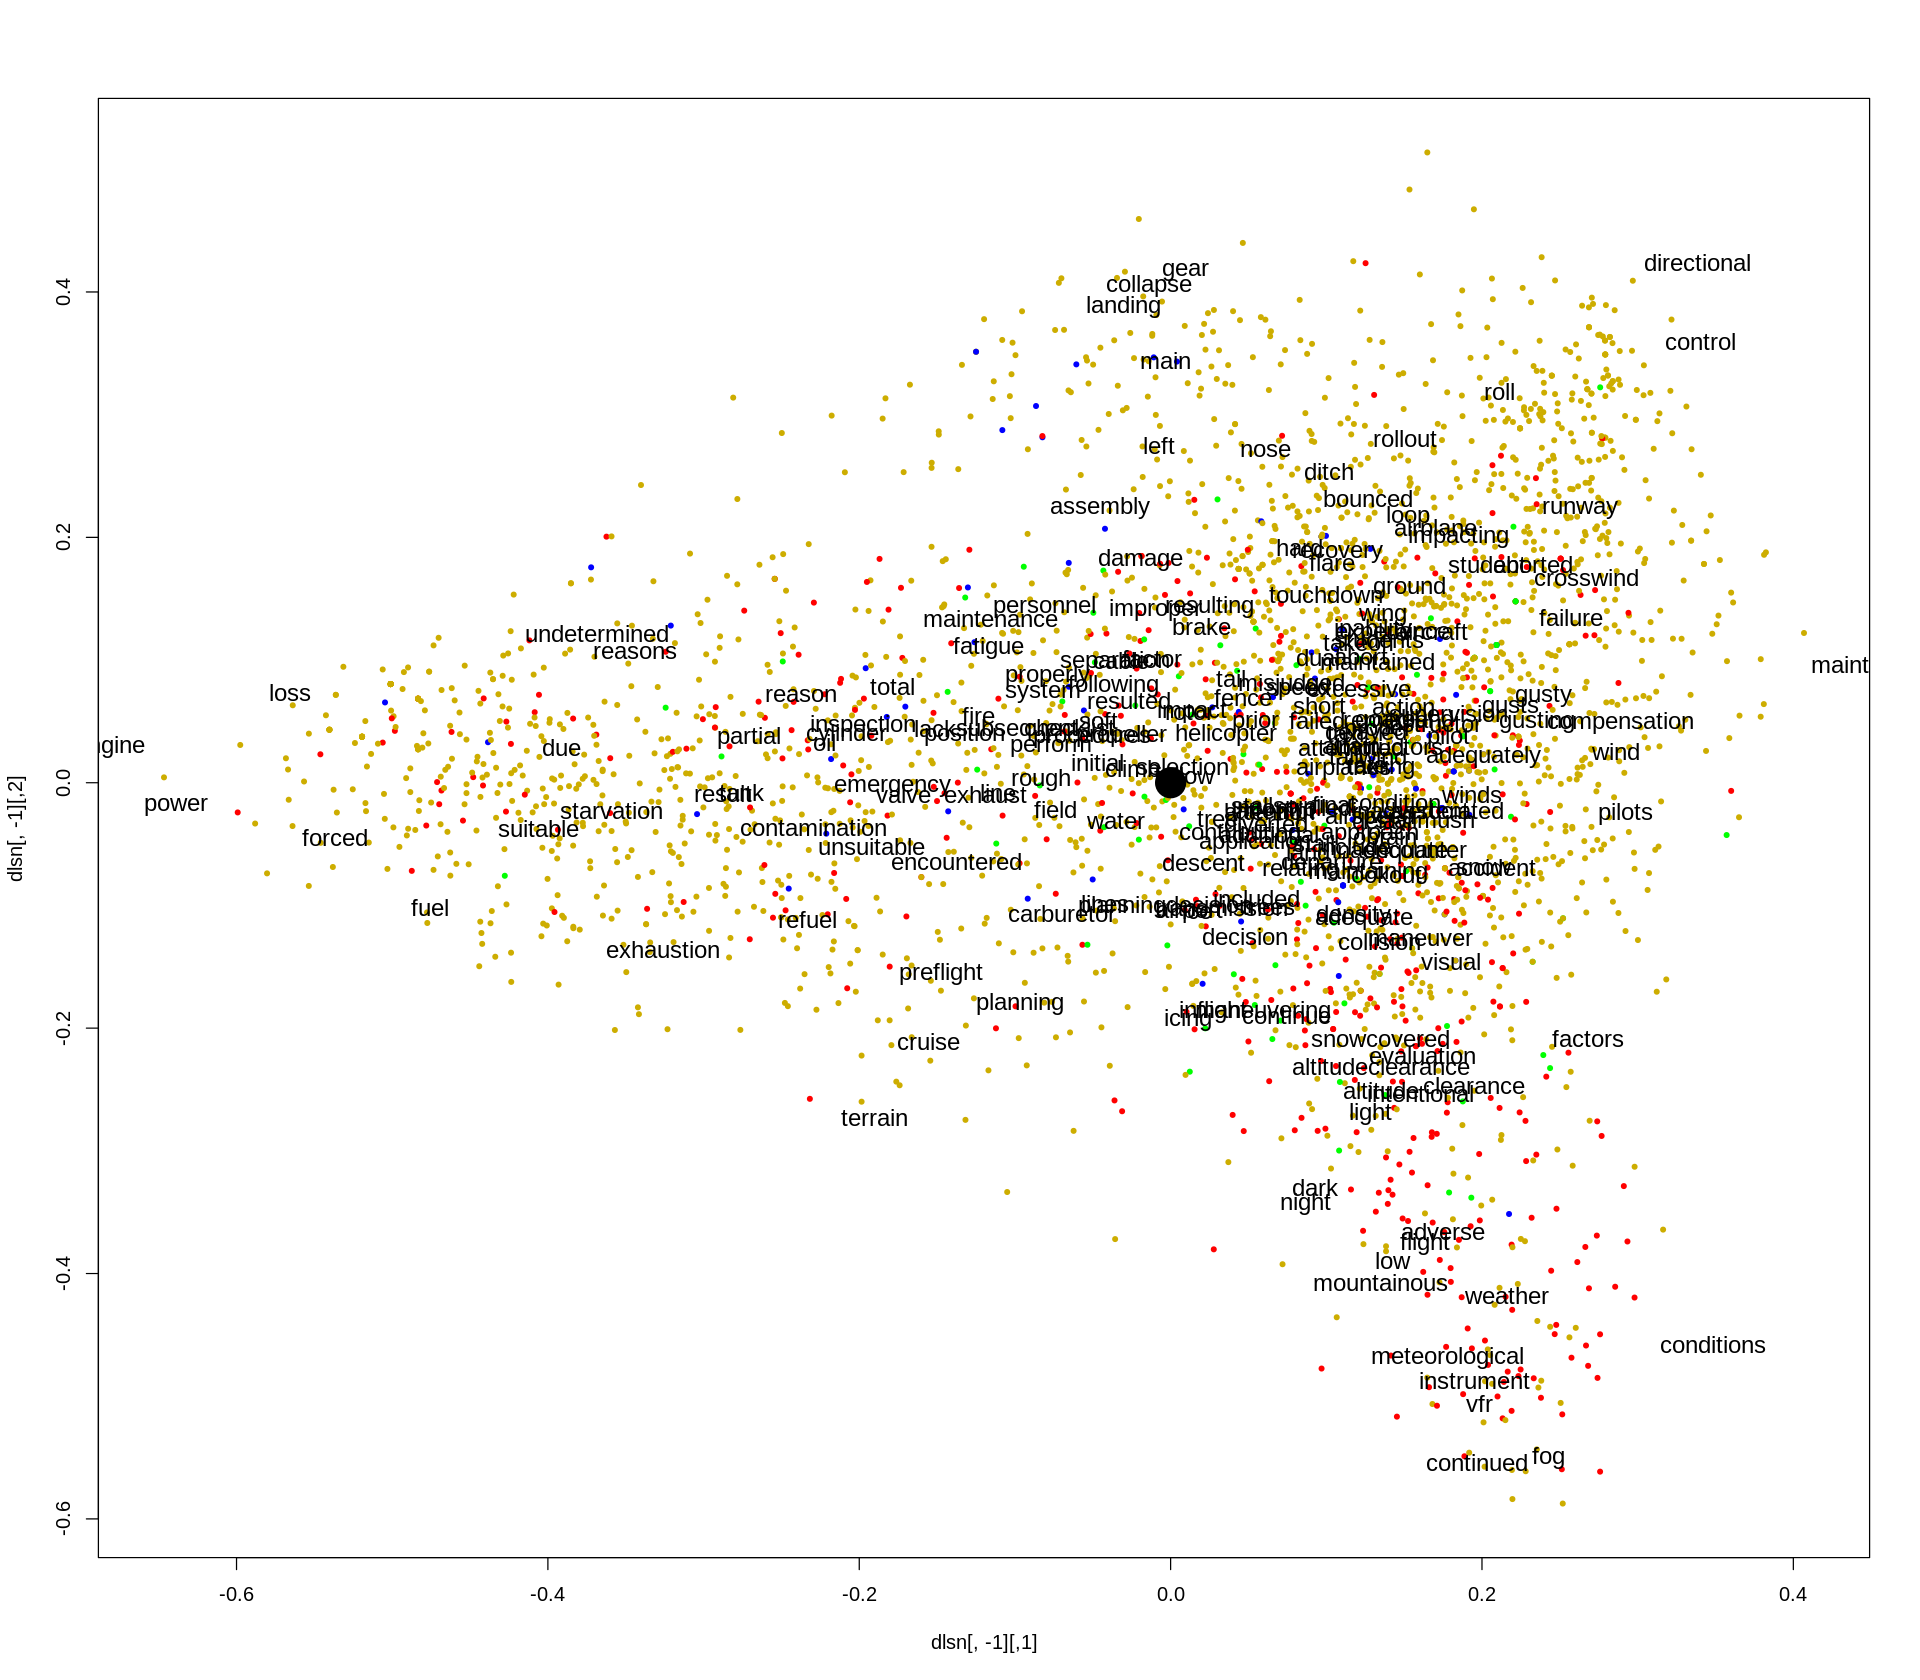

In [114]:
#dev.off()
# definizione e applicazione della funzione di normalizzazione dei vettori termini e documenti
# infatti i vettori tls e dls non sono normali poiche' ottenuti dal prodotto con sk (matrice autovalori) 
normrows <- function(x) x / apply(x,1,norm,"2")
tlsn <- normrows(tls)
dlsn <- normrows(dls)

# nuovo grafico con vettori termini e doc normalizzati
options(repr.plot.width=16, repr.plot.height=14)
plot( dlsn[,-1], pch=20, cex=0.8, col=damcols )
text( tlsn[,-1], labels=words, cex=1.2 )
points( 0, 0, pch=20, cex=5 )

In [115]:
# il termine weather nello spazio LSA compare al centro di un'area con inusuale concentrazione 
# di incidenti destroyed, perciò verifichiamo oggettivamente se esiste una correlazione lessicale tra 
# il termine weather e gli incidenti distruttivi nello spazio ORIGINALE tdm, i.e. non-lsa. In questo
# caso vengono considerati solo i documenti contenenti il termine weather.
# Effettuiamo la verifica con test chiquadro
weather.vs.destr <- table( tdm["weather",]>0, damages=="Destroyed")
dimnames(weather.vs.destr) <- list(weather = c("No", "Si"), destroyed = c("No", "Si"))
chisqtest = chisq.test( weather.vs.destr, correct=FALSE ) 
# la funzione calcola automaticamente le freq. attese (i.e. teoriche) da quelle osservate
# risultato: X-squared = 68.6457, df = 1 (gradi liberta'), p-value < 2.2e-16
# ossia la prob. che il termine weather NON sia correlato agli incidenti destroyed è 2.2e-16  
chisqtest


	Pearson's Chi-squared test

data:  weather.vs.destr
X-squared = 68.646, df = 1, p-value < 2.2e-16


In [116]:
# valori attesi e valori osservati del test chi quadro
chisqtest$expected
chisqtest$observed # 428+54=482 rapporti destroyed

destroyed
weather No       Si       
     No 2631.301 461.69898
     Si  115.699  20.30102

       destroyed
weather   No   Si
     No 2665  428
     Si   82   54

In [117]:
# cerchiamo il termine semanticamente più vicino a weather nello spazio LSA
associate(tls[,2:3], "weather", threshold=0.8)
# dal risultato emerge che il termine adverse e' il secondo termine semanticamente piu' vicino 
# a weather ed e' il primo con norma maggiore, perciò scegliamo adverse come primo termine associato 
# a weather

altitude           adverse             light altitudeclearance 
        0.9998480         0.9995098         0.9994737         0.9986671 
         included               fog            flight             trees 
        0.9985740         0.9980810         0.9977818         0.9970976 
      intentional        instrument       snowcovered          continue 
        0.9960898         0.9954249         0.9951806         0.9947379 
              vfr          decision    meteorological               low 
        0.9947228         0.9936410         0.9934224         0.9921007 
        continued        evaluation       mountainous           descent 
        0.9907567         0.9884695         0.9877191         0.9860781 
     transmission       maneuvering        conditions         clearance 
        0.9859420         0.9856751         0.9850614         0.9816002 
             dark             night               ice              tree 
        0.9792378         0.9735469         0.9511767         0.9506020 
        collision          inflight      contributing           density 
        0.9470849         0.9451145         0.9422031         0.9393835 
      application           airport          adequate          relating 
        0.9368101         0.9349274         0.9348173         0.9246953 
           visual          maneuver             icing           factors 
        0.9158545         0.9132277         0.9126941         0.9078143 
       additional  planningdecision         departure              land 
        0.8738787         0.8723936         0.8672341         0.8649629 
      maintaining           lookout          diverted             stall 
        0.8442202         0.8293348         0.8285070         0.8237283

In [118]:
# verifichiamo se anche la coppia "adverse weather" e' oggettivamente correlata a incidenti dstruttivi
# nello spazio ORIGINALE tdm, ossia se c'è correlazione lessicale come nel caso precedente.
advw.vs.destr <- table( tdm["adverse",]>0 & tdm["weather",]>0, damages=="Destroyed" )
dimnames(advw.vs.destr) <- list(adverse_weather = c("No", "Si"), destroyed = c("No", "Si"))
chisqtest = chisq.test( advw.vs.destr, correct=FALSE )
# risultato: X-squared = 52.9708, df = 1, p-value = 3.385e-13
# ossia la prob. che la coppia di termine adverse weather NON sia lessicalmente correlata 
# agli incidenti destroyed è 3.385e-13
chisqtest


	Pearson's Chi-squared test

data:  advw.vs.destr
X-squared = 52.971, df = 1, p-value = 3.385e-13


In [119]:
# Ripetiamo l'analisi, ma questa volta nello spazio LSA, per stabilire se esiste oggettivamente 
# correlazione SEMANTICA tra la coppia di termini "adverse weather" e gli incidenti distruttivi.
# In questo caso i documenti considerati potrebbero anche non contenere i due termni, ma termini
# semanticamente correlati ad essi.
# Per fare questo trasformiamo la query "adverse weather" in un doc e facciamo il fold_in nello spazio
# LSA
awq <- "adverse weather"
awv <- query( awq, words )
awle <- lw_logtf(awv) * ( 1-entropy(tdm) )
awls <- t(awle) %*% lsar$tk


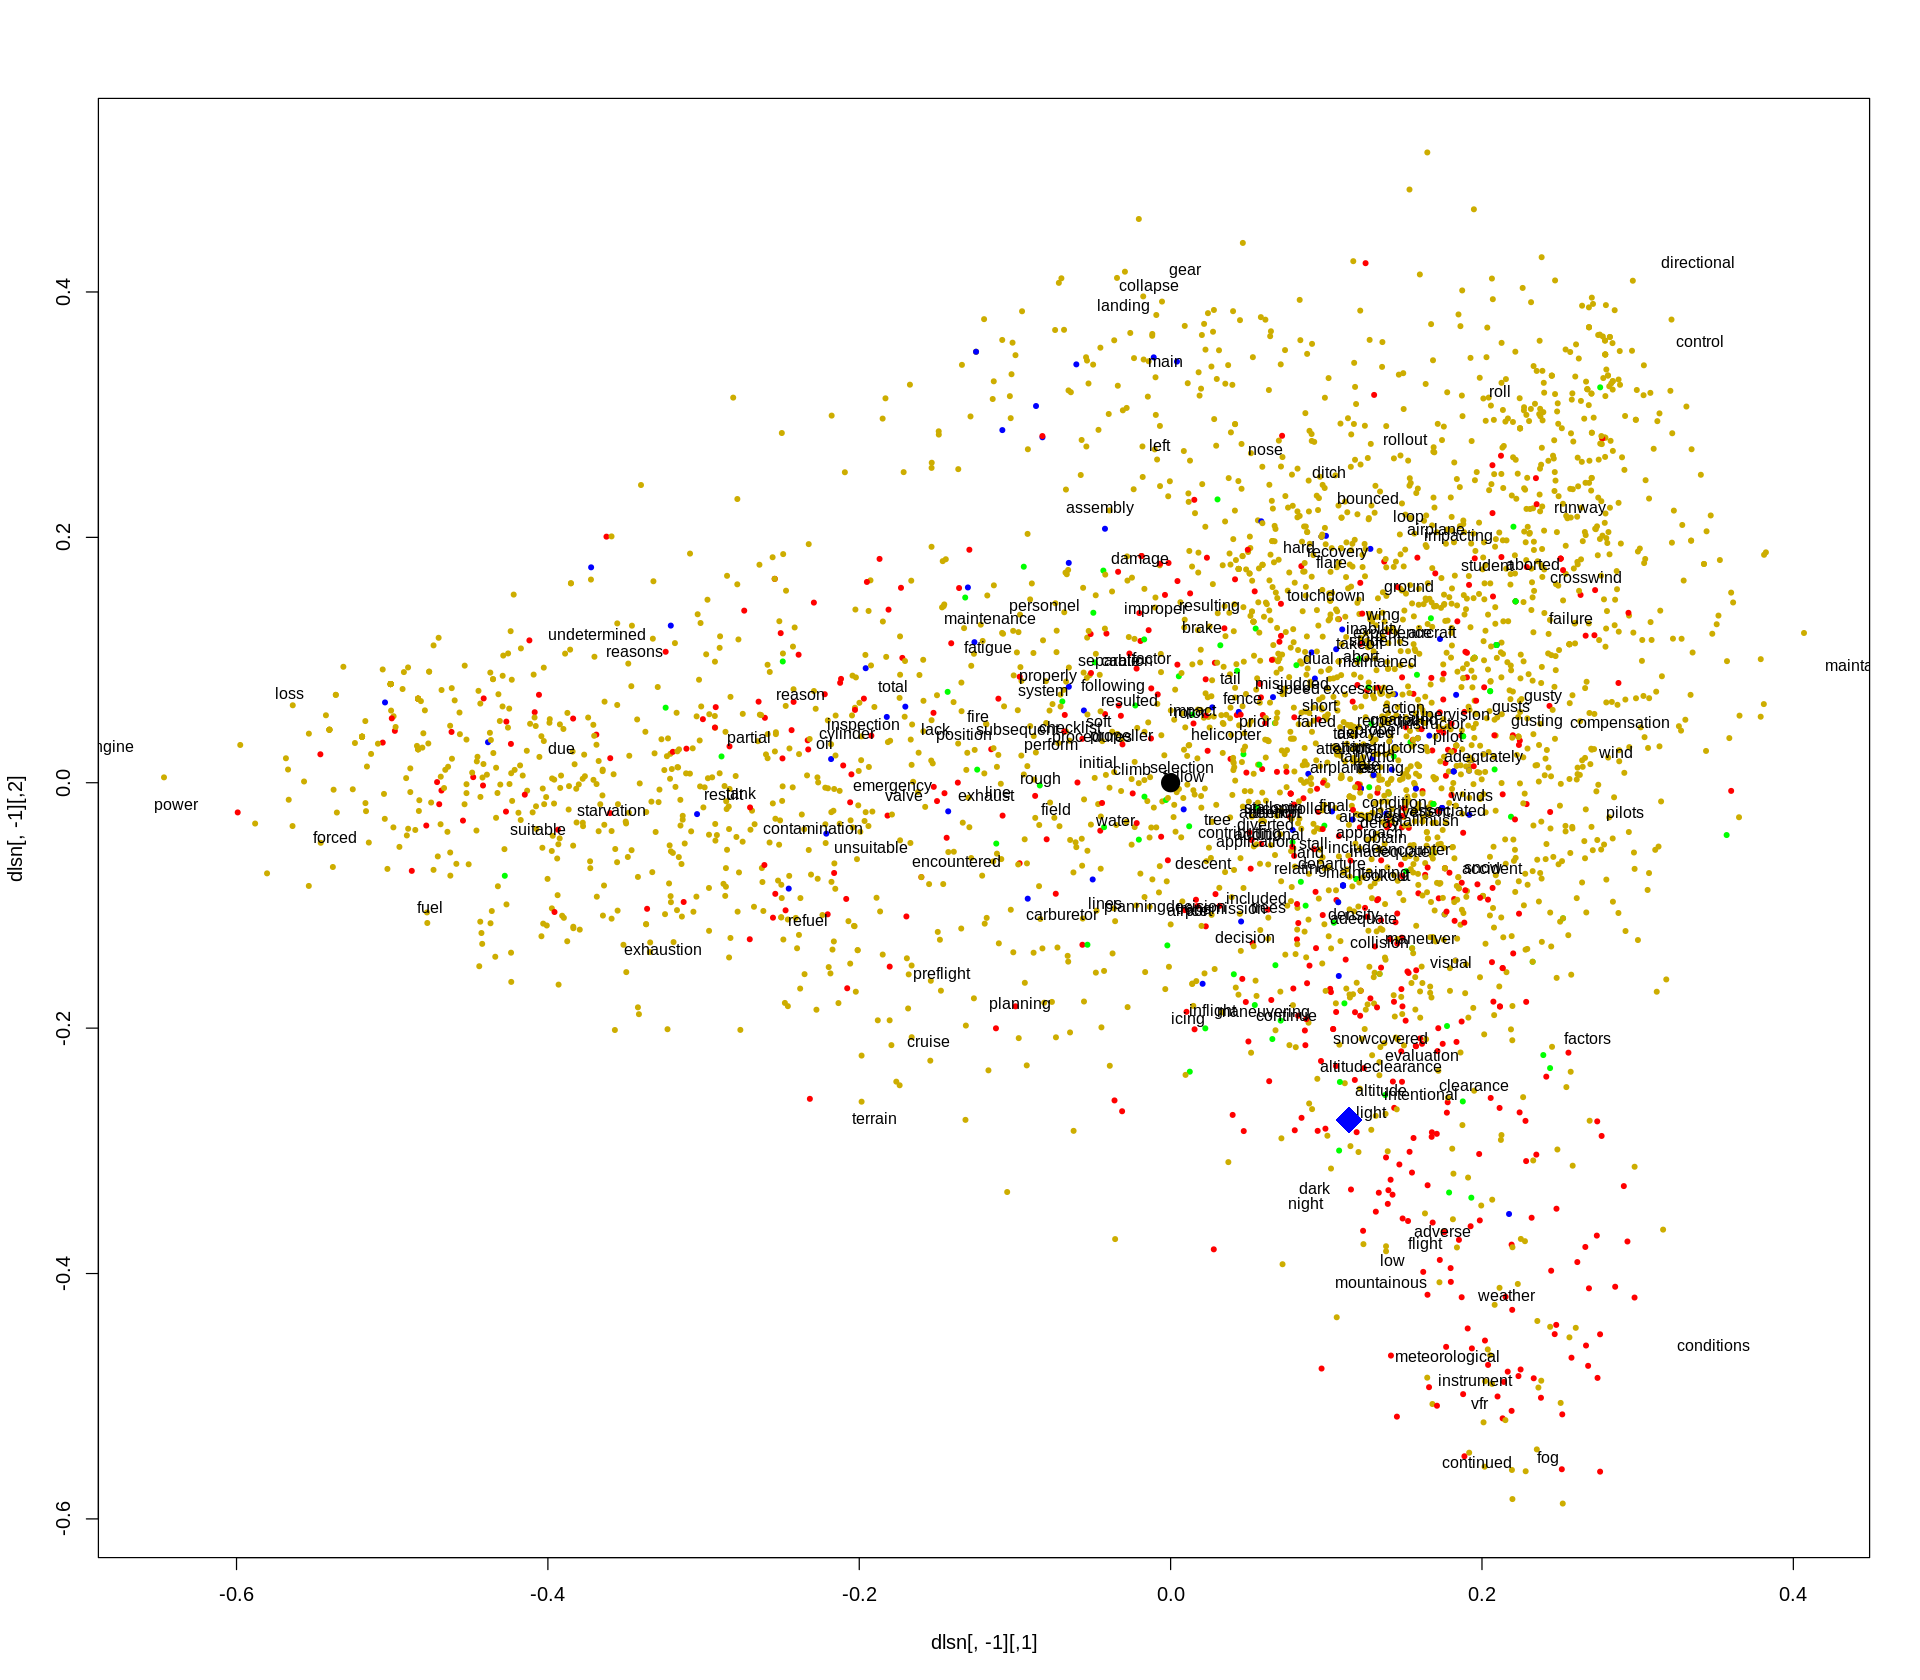

In [120]:
# grafico dei termini e documenti nello spazio LSA relativo alle dimensioni 2 e 3
plot( dlsn[,-1], pch=20, cex=0.8, col=damcols )
text( tlsn[,-1], labels=words, cex=0.8 )
points( 0, 0, pch=20, cex=3 )  # visualizzazione dell'origine 0,0 nel grafico
awlsn <- normrows( awls ) # normalizzazione vettore query
points(awlsn[2],awlsn[3],cex=3,pch=18,col="blue") # visualizzazione della query nel grafico

In [121]:
# definizione funzione che restituisce un vettore con le similarità coseno tra il vettore Q
# e le righe della matrice X
cosines <- function(X, Q) apply( X, 1, cosine, as.vector(Q) )
# definizione funzione che restituisce gli indici (i.e. posizioni) degli N valori più elevati in X 
top <- function(X, N) order( X, decreasing=TRUE )[1:N]


In [122]:
# indice dei 10 documenti che risultano semanticamente piu' simili alla query "adverse weather"
# considerando solo la dimensione 2 e 3
top( cosines( dls[,2:3], awls[2:3] ), 10 )
# elenco dei 10 documenti sopra menzionati 
causes[top(cosines(dls[,2:3], awls[2:3]), 10)]
# tra i documenti ci sono rapporti dove la causa non e' sempre legata alle condizioni meteo,
# e.g. "the pilot's delay in executing a go-around ..."
# quindi con due sole dimensioni LSA la perdita d'informazione e' significativa  


[1] 1956  773 1824 1503 2278  157 1624 1820  282  725

[1] "the pilot's delay in executing a go-around while conducting a simulated emergency landing, which resulted in an in flight collision with terrain."                                                                                                                                                                     
 [2] "the pilot's improper decision to continue flight in instrument meteorological conditions, and which resulted in an in-flight collision with trees.  Factors were the fog, and dark night conditions."                                                                                                                  
 [3] "the inadequate in-flight emergency planning/decision, the checklist not followed and excessive approach altitude by the pilot.  Contributing factors were the loose oil return line and weather."                                                                                                                      
 [4] "The pilot's inadvertent (dark, nighttime) VFR flight into instrument meteorological conditions and subsequent loss of altitude control.  A factor in the accident was the pilot's inadequate preflight weather evaluation."                                                                                            
 [5] "The pilot's poor decision to continue the flight into the rising mountainous terrain, and subsequent failure to maintain clearance with the trees.  Contributing factors were rising mountainous terrain, the high density altitude, and the exceeded weight and balance and performance capability of the helicopter."
 [6] "the pilot's improper in-flight decision to continue flight into known adverse weather.  A factor was the icing conditions."                                                                                                                                                                                            
 [7] "The pilot's failure to maintain adequate altitude above, and/or clearance with, mountainous terrain during night visual flight rules flight.  Factors included mountainous terrain and dark night light conditions."                                                                                                   
 [8] "The pilot continued visual flight flight into instrument flight conditions resulting in an in-flight collision with terrain.  Low clouds were a factor."                                                                                                                                                               
 [9] "the pilot's continuation of a VFR flight into instrument meteorological conditions, and his subsequent failure to maintain terrain clearance.  Contributing factors were his failure to obtain a preflight weather briefing, and his failure to obtain any in-flight weather advisories."                              
[10] "The pilot's improper operation of the flight controls while attempting a takeoff from an unimproved surface. A factor was rough and uneven terrain."

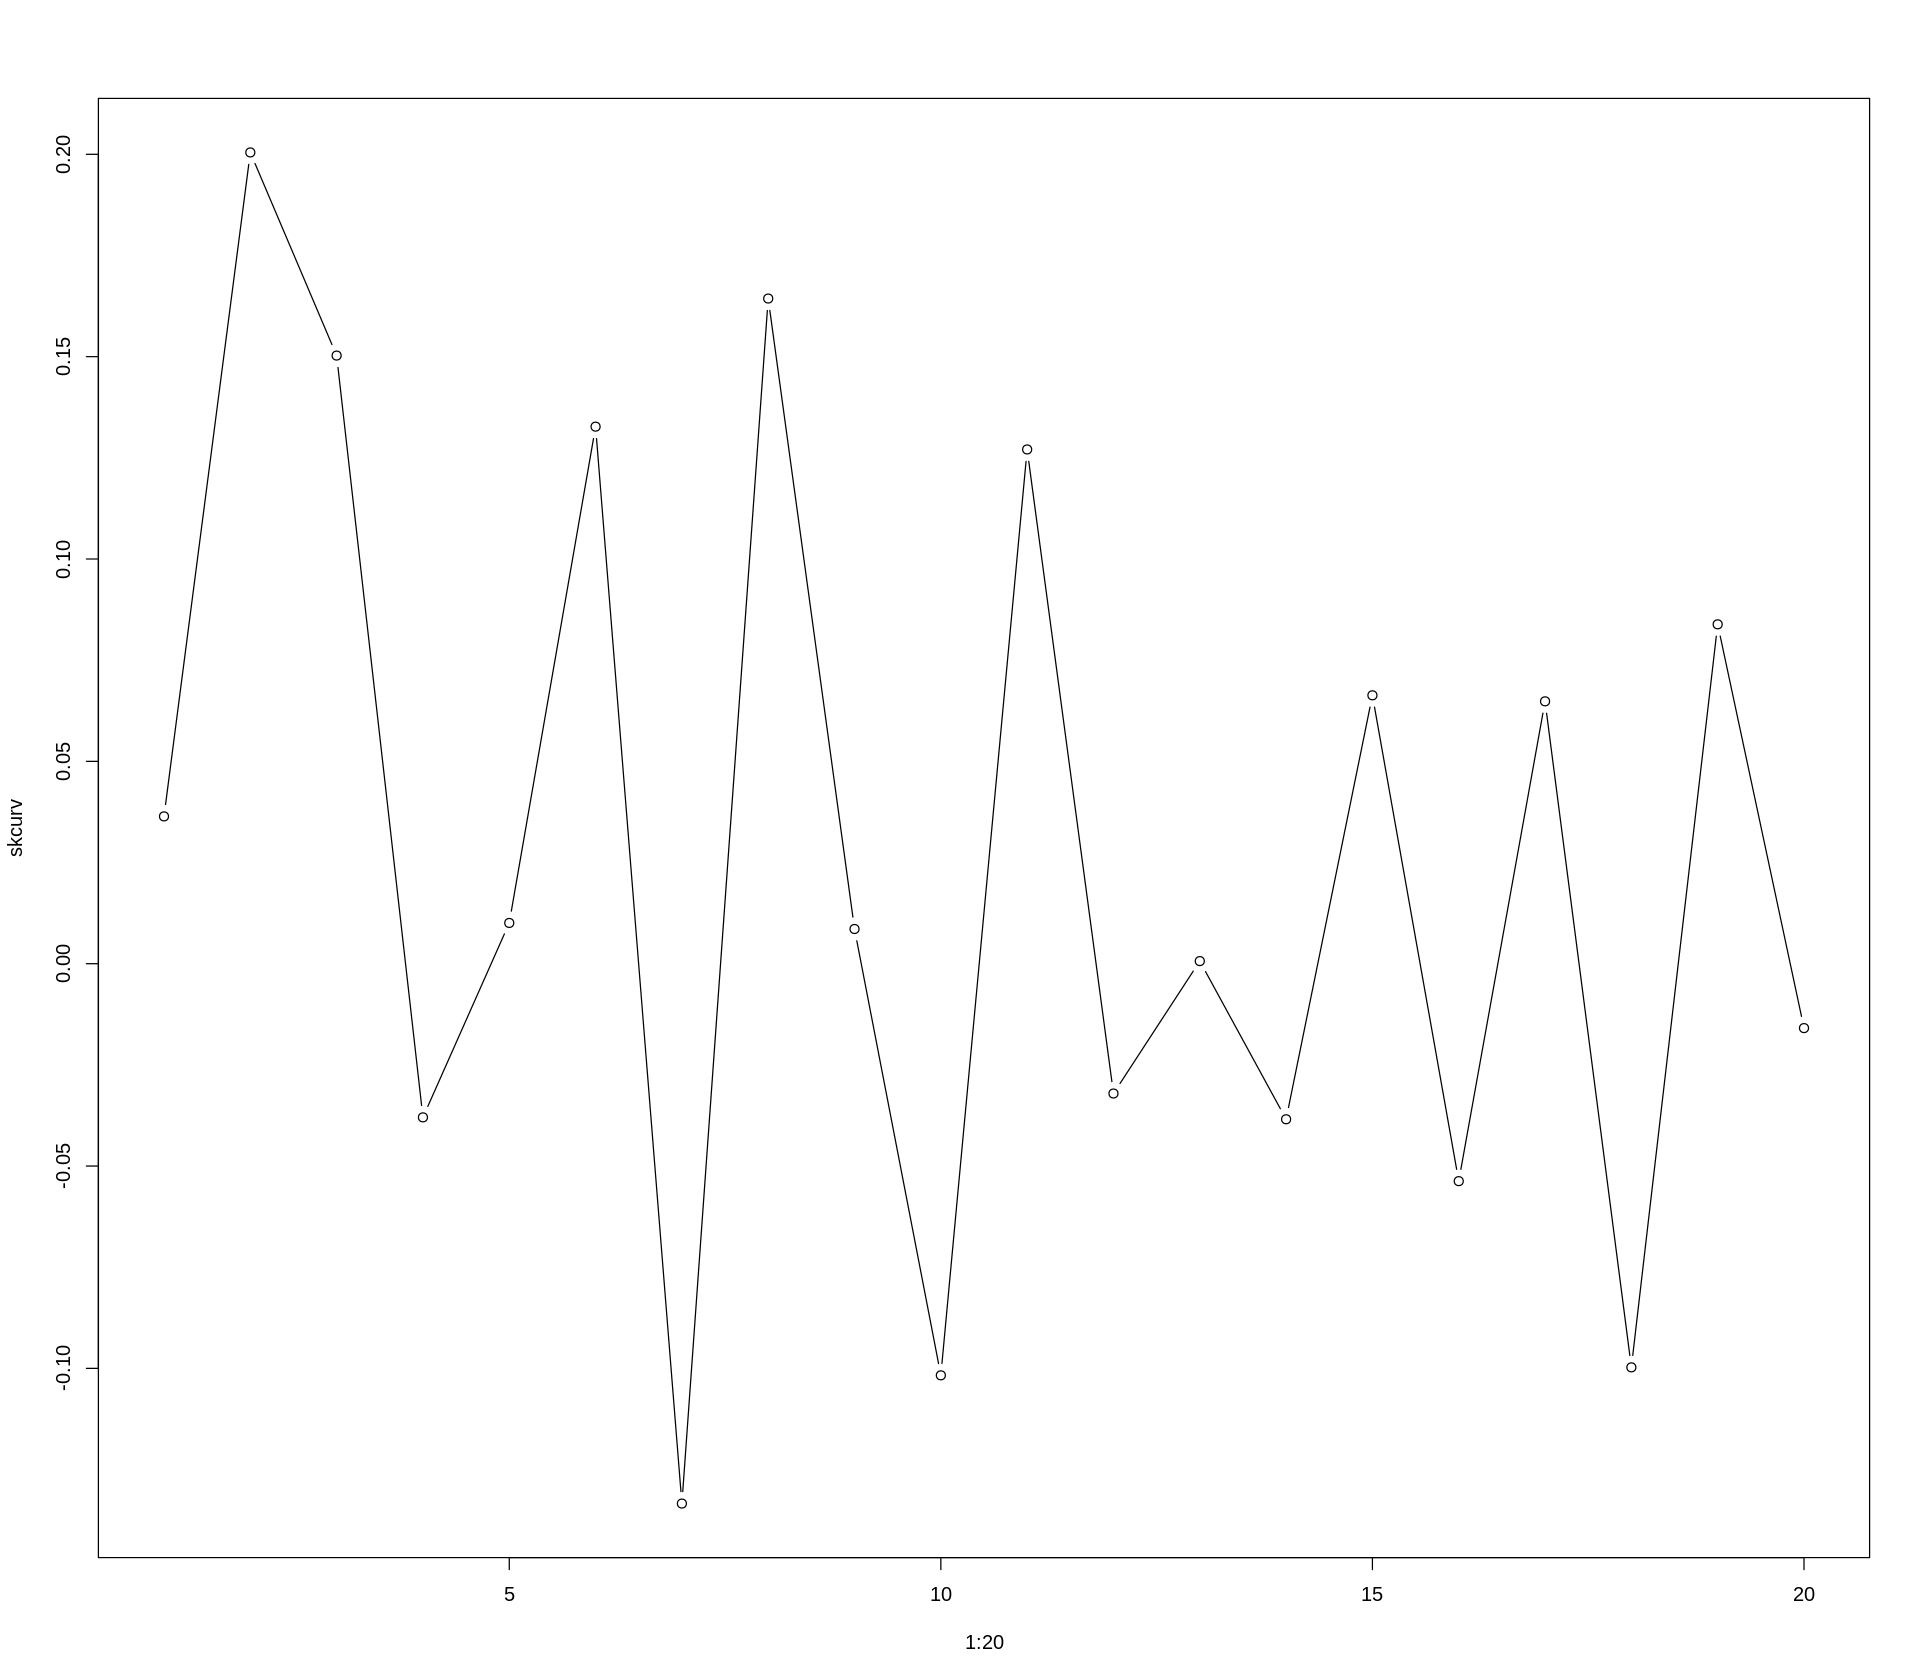

In [123]:
# scegliamo uno spazio LSA con piu' dimensioni e quindi con minore perdita d'informazione.
# Individuamo il punto di knee nella sequenza degli autovalori visualizzati in precedenza
# tra i minimi locali della funzione di curvatura sottodefinita della sequenza di autovalori 
fordiff <- function(x) x[2:length(x)] - x[1:(length(x)-1)]
skd <- fordiff(lsar$sk)
skdd <- fordiff(skd)
skcurv <- skdd[1:20] / (1+(skd[1:20])^2)^1.5
plot( 1:20, skcurv, type="b" )


In [124]:
# il primo minimo locale e' 4, perciò selezioniamo le prime 4 dimensioni dello spazio LSA
# ed estraiamo da questo spazio i primi 10 doc semanticamente piu' simili alla query  
causes[top(cosines(dls[,1:4], awls[1:4]), 10)]
# ora in ogni doc visualizzato le cause indicano cattive condizioni meteo, anche nei doc come 
# ad esempio il 5° che non contiene affatto i termini adverse weather.

[1] "pilot's continued visual flight into instrument meteorological conditions."                                                                                                                                                                   
 [2] "The pilot's disregard of  the weather evaluation and his attempt to fly into known adverse weather without an instrument rating.  Factors in the accident were the low ceiling, the low visibility, and the icing conditions."                
 [3] "The pilot's continued flight into known adverse weather.  A factor was the snow."                                                                                                                                                             
 [4] "The pilot's continued flight into adverse weather conditions and his failure to maintain clearance with terrain while maneuvering.  Factors were, the low cloud and mist weather conditions, and the dark night light conditions."            
 [5] "The pilot's continued flight into instrument meteorological conditions.  Contributing factors were fog, low ceilings, drizzle/mist, rising terrain, and the non-availability of a functioning transponder."                                   
 [6] "The pilot's continued VFR flight into instrument meteorological conditions while maneuvering.  Factors in the accident were low ceilings, snow showers, whiteout conditions, and snow-covered terrain."                                       
 [7] "The pilot's continued VFR flight into instrument meteorological conditions, and subsequent collision with trees while in cruise flight.  Factors in the accident were weather conditions consisting of freezing rain, mist, and low ceilings."
 [8] "The pilot's continued flight into adverse weather conditions after becoming lost/disoriented.  Factors in the accident were rising terrain, a blind/box canyon, low clouds, and rain."                                                        
 [9] "The pilot's poor judgment in that he intentionally initiated VFR flight into instrument meteorological conditions.  Contributing factors were low ceiling and obscuration, and the pilot's lack of recent instrument time."                   
[10] "The pilot's continued flight into adverse weather and not maintaining altitude/clearance from the static line during cruise flight.  Factors were the static wire, the darkness of night, the low ceiling, and the vehicle."

In [125]:
# Per determinare se esiste una correlazione tra adverse weather e incidenti distruttivi con un
# modello di ricerca semantico basato su ranking, come quello sopra definito, occorre, a differenza
# del modello di ricerca booleano basato su match lessicale analizzato in precedenza, fissare
# il numero massimo di risultati restiuiti dal modello di ricerca da considerare (R-precision)
# Questo numero e' dato dalla numerosita' degli incidenti distruttivi nell'intero dataset degli
# incidenti. Calcoliamo percio' la distribuzione della classe degli incidenti nei primi k risultati
# della ricerca con k=10, 50, 100, 482 (=num. totale incidenti distruttivi nel dataset, 15%)
table(damages[top(cosines(dls[,1:4],awls[1:4]),10)])
table( damages )
table( damages[ top( cosines( dls[,1:4], awls[1:4] ), 482 ) ] ) # 183 distruttivi osservati su 72 attesi (15% di 482)
awq.vs.destr <- table(1:nrow(dls) %in% top(cosines(dls[,1:4], awls[1:4]), 482), damages=="Destroyed" )
dimnames(awq.vs.destr) <- list(adverse_weather = c("No", "Si"), destroyed = c("No", "Si"))
awq.vs.destr
# 183 incidenti distruttivi restituiti su 72 attesi in 482 incidenti (482-precision), 
# indicano o meno correlazione tra adverse weather e incidenti distruttivi ?



  Destroyed       Minor        None Substantial 
          3           0           0           7 

damages
  Destroyed       Minor        None Substantial 
        482          82          91        2574 


  Destroyed       Minor        None Substantial 
        183          11          28         260 

               destroyed
adverse_weather   No   Si
             No 2448  299
             Si  299  183

In [126]:
# Rispondiamo alla domanda eseguendo una verifica oggettiva mediante test chiquadro 
chisq.test( awq.vs.destr, correct=FALSE )
# risultato: 236.8296, df = 1, p-value < 2.2e-16
# ossia la prob. che la coppia di termini adverse weather NON sia semanticamente correlata 
# agli incidenti destroyed e' 2.2e-16
# percio' le cattive condizioni meteo contribuiscono a provocare quasi il 40% degli incidenti 
# distruttivi (39%)



	Pearson's Chi-squared test

data:  awq.vs.destr
X-squared = 236.83, df = 1, p-value < 2.2e-16


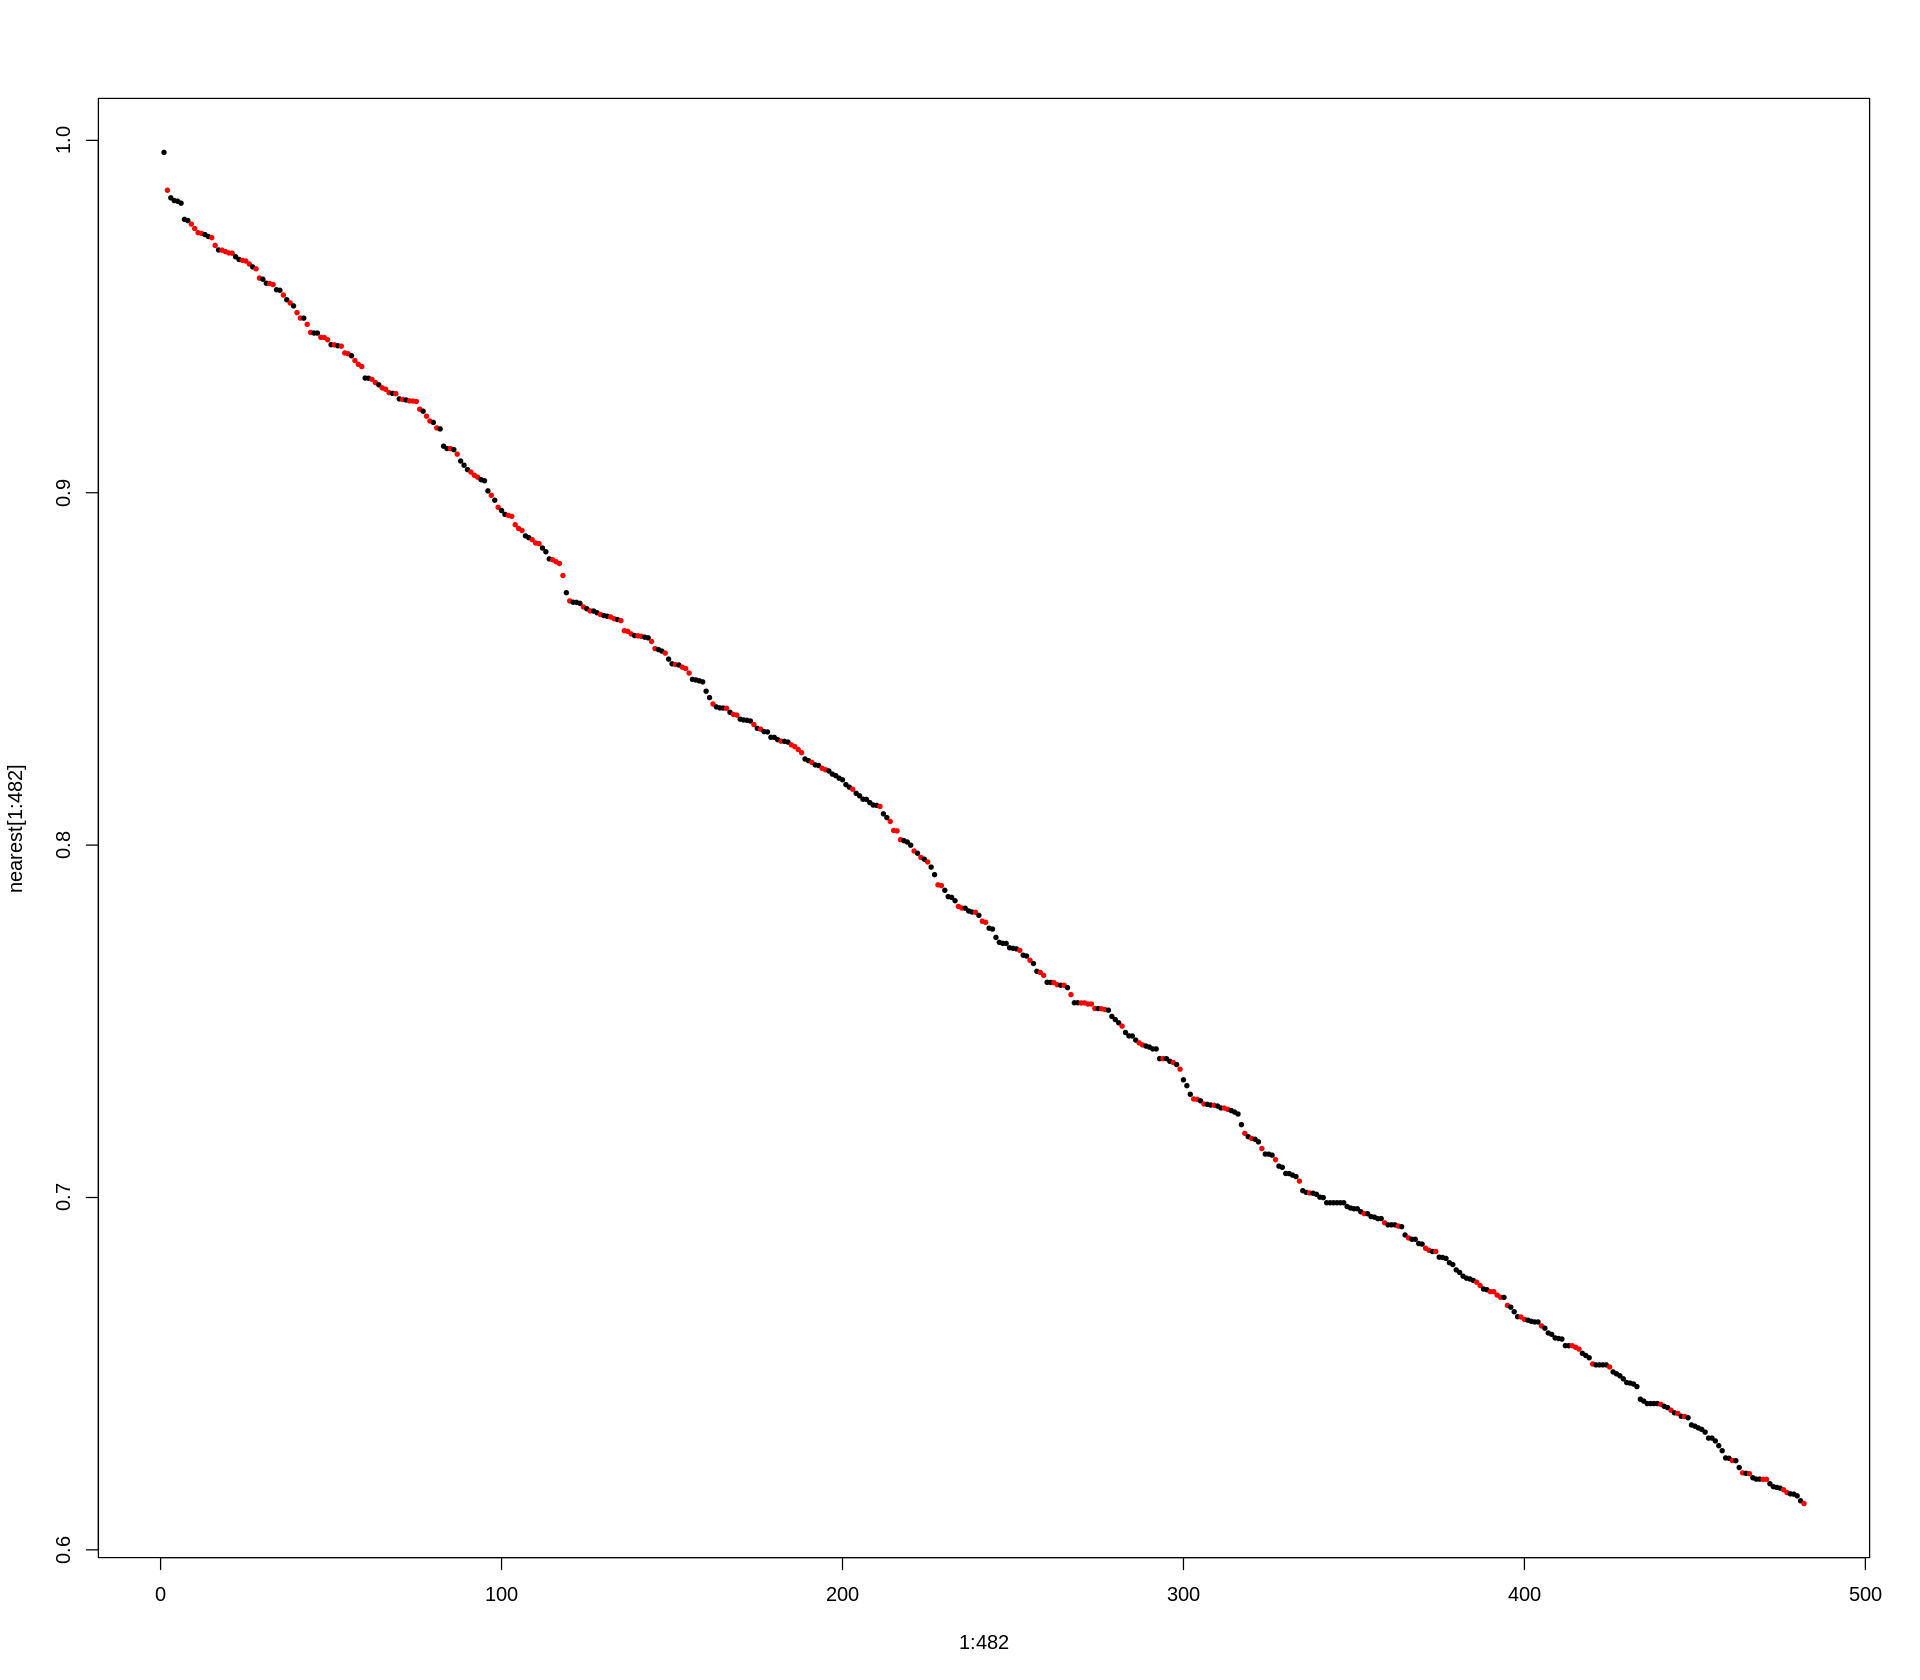

In [127]:
# Verifichiamo come le classi di incidenti sono distribuite nel risultato di ricerca semantica 
# rispetto alle cattive condizioni meteo
# ordina i rapporti sugli incidenti aerei per rilevanza semantica decrescente rispetto alla query awls
nearest <- sort( cosines( dls[,1:4], awls[1:4] ), decreasing=T )

damcols2 <- rep( "black", 3229 ) # crea lista con 3229 volte la parola black
damcols2[ damages == "Destroyed" ] <- "red" # pone a red i rapporti destroyed

plot( 1:482, nearest[1:482], pch=20, cex=0.7, col=damcols2[strtoi(names(nearest))] )
# nel grafico gli incidenti destroyed sono rappresentati in rosso e si nota una loro maggiore
# concentrazione tra i primi documenti del risultato di ricerca. Questo indica che gli incidenti
# destroyed sono quelli con maggiore similarita' semantica con la query adverse weather. 


In [128]:

# Ora vogliamo individuare, se esistono, delle cause piu' specifiche di questi incidenti distruttivi
# legati alle cattive condizioni meteo, percio' iteriamo il metodo sopra esposto cercando nello spazio 
# LSA a 4 dimensioni quali altri termini sono semanticamente piu' correlati alla coppia adverse weather  
# percio' dobbiamo applicare il calolco della similarita' semantica tra una query e un termine
tksrs <- lsar$tk %*% diag( sqrt( lsar$sk ) )
awdksrs <- awls %*% diag( lsar$sk^-0.5 )

# elenco dei termini in ordine crescente di similarita' semantica con la coppia averse weather
sort( cosines( tksrs[,1:4], awdksrs[1:4] ) ) 
# coseno tra -1 e 1 perché lo spazio vettoriale comprende anche i quadranti negativi


collapse              gear              main              left 
    -0.7809556581     -0.7568813430     -0.7407086256     -0.7033802914 
         assembly              nose             brake         personnel 
    -0.6615233671     -0.6471575672     -0.6413805856     -0.6047854671 
           damage       maintenance           bounced           rollout 
    -0.5772186407     -0.5562175624     -0.5195414836     -0.4995178455 
            cable          recovery             ditch              hard 
    -0.4898458051     -0.4779588019     -0.4641320136     -0.4312796071 
          fatigue              roll              loop             flare 
    -0.4257924951     -0.4248903334     -0.4214217052     -0.4039149604 
          landing       directional            system              fire 
    -0.3872864851     -0.3868043220     -0.3613951323     -0.3509651350 
       separation         touchdown         impacting          properly 
    -0.3403002546     -0.3366313405     -0.2944617584     -0.2778808099 
       inspection          improper              dual             total 
    -0.2635688741     -0.2413682621     -0.2402530555     -0.2399510640 
              oil              tail          position           student 
    -0.2376847407     -0.2330878830     -0.2303634304     -0.2263887327 
          control          airplane              wing          students 
    -0.2137878808     -0.2109878964     -0.1983653261     -0.1957823623 
        checklist               due          cylinder            runway 
    -0.1933135437     -0.1894034385     -0.1891281730     -0.1866497895 
             tank        starvation            engine         propeller 
    -0.1753964967     -0.1747579655     -0.1667526284     -0.1574682572 
             loss      undetermined           reasons        procedures 
    -0.1567263618     -0.1544574389     -0.1487086097     -0.1480394701 
           reason            ground         misjudged         crosswind 
    -0.1462483195     -0.1453862911     -0.1292303423     -0.1236190205 
        resulting           aborted           partial         following 
    -0.1227019368     -0.1187528588     -0.1173415921     -0.1123780406 
            valve     contamination             rotor             power 
    -0.1065882932     -0.1033700161     -0.0994642993     -0.0928242278 
       experience              fuel            result              soft 
    -0.0860590091     -0.0840954247     -0.0832504090     -0.0827961355 
        inability             abort           perform             fence 
    -0.0824123029     -0.0734479053     -0.0687709011     -0.0668310327 
           forced              line             speed           takeoff 
    -0.0608874248     -0.0487768027     -0.0476630748     -0.0383338365 
        emergency        subsequent          suitable        maintained 
    -0.0349682992     -0.0296827989     -0.0283739283     -0.0242719223 
        excessive             prior              lack            impact 
    -0.0234872877     -0.0218516169     -0.0129051264     -0.0046835414 
          exhaust          resulted          aircraft        exhaustion 
    -0.0041650688     -0.0006621179      0.0027625033      0.0076807767 
            short            factor            action       supervision 
     0.0098141716      0.0227494957      0.0421549123      0.0525807610 
          initial            refuel            failed             rough 
     0.0529492471      0.0540450527      0.0589355284      0.0684705603 
         remedial        helicopter        instructor             field 
     0.0689412737      0.0761058704      0.0792890675      0.0967335530 
        selection       instructors             gusts              taxi 
     0.1013054068      0.1171752293      0.1240027372      0.1278298895 
            gusty           failure           delayed        unsuitable 
     0.1288219708      0.1355070536      0.1357651924      0.1361238546 
         goaround             climb            follow         prefl

In [129]:

# scegliamo i termini con elevata similarità coseno e norma massima, percio' estraiamo la norma 
# di quelli con similarita' cosine ad adverse weather maggiore di 0.99  
tnorms4 <- apply( tls[,1:4], 1, norm, "2" )
tnorms4[cosines(tksrs[,1:4],awdksrs[1:4])>0.99] # instrument ha norma piu' alta, i.e. piu' rilevante


adverse      continued            fog     instrument meteorological 
     0.8839407      1.0439941      0.7397838      1.4622800      1.1670988 
           vfr 
     0.9329952

In [130]:
# definizione funzione per velocizzare il calcolo della similarita' tra query e termini in LSA
makequery <- function(Q, TDM, LSA) {
  V <- query( Q, rownames(TDM) )
  W <- lw_logtf(V) * (1-entropy(TDM))
  LS <- t(W) %*% LSA$tk
  DK <- LS %*% diag(LSA$sk^-1)
  DKSRS <- DK %*% diag(sqrt(LSA$sk))
  list( query=Q, bin=V, v=W, dk=DK, ls=LS, dksrs=DKSRS )
}


In [131]:
awi <- makequery( "adverse weather instrument", tdm, lsar )
causes[top(cosines(dls[,1:4],awi$ls[1:4]),10)] # primi 10 rapporti più rilevanti per la nuova query
table( damages[ top( cosines( dls[,1:4], awi$ls[1:4] ), 482 ) ] )


[1] "pilot's continued visual flight into instrument meteorological conditions."                                                                                                                                                                   
 [2] "The pilot's disregard of  the weather evaluation and his attempt to fly into known adverse weather without an instrument rating.  Factors in the accident were the low ceiling, the low visibility, and the icing conditions."                
 [3] "The pilot's continued flight into instrument meteorological conditions.  Contributing factors were fog, low ceilings, drizzle/mist, rising terrain, and the non-availability of a functioning transponder."                                   
 [4] "The pilot's continued VFR flight into instrument meteorological conditions while maneuvering.  Factors in the accident were low ceilings, snow showers, whiteout conditions, and snow-covered terrain."                                       
 [5] "The pilot's continued flight into adverse weather conditions and his failure to maintain clearance with terrain while maneuvering.  Factors were, the low cloud and mist weather conditions, and the dark night light conditions."            
 [6] "The pilot's continued flight into known adverse weather.  A factor was the snow."                                                                                                                                                             
 [7] "The pilot's poor judgment in that he intentionally initiated VFR flight into instrument meteorological conditions.  Contributing factors were low ceiling and obscuration, and the pilot's lack of recent instrument time."                   
 [8] "The pilot's continued flight into adverse weather conditions after becoming lost/disoriented.  Factors in the accident were rising terrain, a blind/box canyon, low clouds, and rain."                                                        
 [9] "The pilot's continued VFR flight into instrument meteorological conditions, and subsequent collision with trees while in cruise flight.  Factors in the accident were weather conditions consisting of freezing rain, mist, and low ceilings."
[10] "The pilot's continued flight into adverse weather and not maintaining altitude/clearance from the static line during cruise flight.  Factors were the static wire, the darkness of night, the low ceiling, and the vehicle."


  Destroyed       Minor        None Substantial 
        183          11          28         260 

In [132]:
# calcoliamo quanti doc ci sono in comune tra quest'ultima query piu' specifica e la query adverse weather
# 477 in comune su 482, quindi il risultato e' il medesimo anche aggiungendo instrument
length(intersect(top(cosines(dls[,1:4], awls[1:4]), 482), top(cosines(dls[,1:4], awi$ls[1:4]), 482)))


[1] 477

In [133]:
# scegliamo il 4° termine da aggiungere alla query
sort( cosines( tksrs[,1:4], awi$dksrs[1:4] ) )
tnorms4[cosines(tksrs[,1:4],awi$dksrs[1:4])>0.99] # e' metereological con la norma piu' alta


collapse              gear              main              left 
     -0.787624137      -0.767448597      -0.747723185      -0.710287524 
         assembly              nose             brake         personnel 
     -0.666818228      -0.664838451      -0.658460251      -0.624065223 
           damage       maintenance           bounced           rollout 
     -0.601155162      -0.573966428      -0.551300676      -0.522120005 
         recovery             cable             ditch              hard 
     -0.511062047      -0.491923182      -0.484648171      -0.459992571 
             roll              loop             flare           fatigue 
     -0.443626887      -0.440701715      -0.439064469      -0.416282040 
      directional           landing            system         touchdown 
     -0.410796854      -0.400711387      -0.365446334      -0.363101519 
             fire        separation         impacting          properly 
     -0.357115184      -0.339080552      -0.318085069      -0.296163691 
       inspection              dual          improper           student 
     -0.283852849      -0.280380520      -0.275013969      -0.262063637 
         position          airplane             total          students 
     -0.248409748      -0.242310887      -0.238957864      -0.236375639 
          control              tail              wing               oil 
     -0.235045819      -0.234064862      -0.226867029      -0.219580006 
        checklist            runway              tank               due 
     -0.217215746      -0.214461006      -0.195138437      -0.189830246 
       starvation        procedures          cylinder         misjudged 
     -0.188739740      -0.170496012      -0.165008954      -0.161891906 
           ground         crosswind         propeller            engine 
     -0.159102999      -0.158597058      -0.154493585      -0.147318943 
          aborted         resulting              loss      undetermined 
     -0.142318273      -0.138538755      -0.138305407      -0.122397860 
          reasons     contamination            reason         following 
     -0.116349711      -0.115748724      -0.114645406      -0.111779383 
       experience         inability              fuel             valve 
     -0.107451343      -0.106993234      -0.101386053      -0.096368841 
            abort             rotor           partial             fence 
     -0.094769629      -0.094242107      -0.091292043      -0.090970598 
             soft           perform            result             power 
     -0.082751989      -0.079272187      -0.076463371      -0.071225426 
            speed              line           takeoff             prior 
     -0.056931453      -0.056777383      -0.055553935      -0.053167018 
        excessive        maintained            forced        subsequent 
     -0.052161761      -0.045909198      -0.043721127      -0.042503979 
        emergency          resulted          aircraft             short 
     -0.031573866      -0.023469987      -0.018738604      -0.015323817 
       exhaustion              lack          suitable            impact 
     -0.010992037      -0.002919428      -0.001697251      -0.001013310 
           action       supervision            factor           exhaust 
      0.005282984       0.010213447       0.015040601       0.019600977 
           failed          remedial            refuel        instructor 
      0.029345061       0.030854216       0.036879994       0.037705425 
          initial             rough        helicopter       instructors 
      0.059643902       0.061123899       0.062201324       0.075958474 
        selection             field             gusts             gusty 
      0.076799558       0.079774830       0.086606894       0.093664743 
             taxi           delayed          goaround           failure 
      0.100839430       0.101326007       0.112537874       0.117556535 
           follow      compensation        unsuitable         prefl

continued            fog     instrument meteorological            vfr 
     1.0439941      0.7397838      1.4622800      1.1670988      0.9329952

In [134]:
# rieseguiamo la query aggiungendo ad essa metereological
awim <- makequery( "adverse weather instrument meteorological", tdm, lsar )
# 475 doc in comune su 482, quindi ancora il risultato e' il medesimo aggiungendo metereological
table( damages[ top( cosines( dls[,1:4], awim$ls[1:4] ), 482 ) ] ) #
length(intersect(top(cosines(dls[,1:4], awls[1:4]), 482), top(cosines(dls[,1:4], awim$ls[1:4]), 482)))



  Destroyed       Minor        None Substantial 
        184          11          29         258 

[1] 475

In [135]:
# scegliamo il 5° termine da aggiungere alla query
sort( cosines( tksrs[,1:4], awim$dksrs[1:4] ) )
tnorms4[cosines(tksrs[,1:4],awim$dksrs[1:4])>0.99] # e' continued


collapse              gear              main              left 
     -0.794436372      -0.775878814      -0.755036732      -0.717787677 
             nose          assembly             brake         personnel 
     -0.676640053      -0.673470870      -0.669983970      -0.632875417 
           damage       maintenance           bounced           rollout 
     -0.613463063      -0.581431115      -0.567538547      -0.536529387 
         recovery             ditch             cable              hard 
     -0.527810562      -0.498484901      -0.497866615      -0.475947763 
             roll             flare              loop       directional 
     -0.457250542      -0.456345158      -0.454478639      -0.426169738 
          fatigue           landing         touchdown            system 
     -0.416386339      -0.411270634      -0.379278426      -0.370271065 
             fire        separation         impacting          properly 
     -0.360322824      -0.344251327      -0.333769233      -0.305769681 
             dual        inspection          improper           student 
     -0.298595855      -0.289698954      -0.289291362      -0.280828193 
         airplane          students          position           control 
     -0.259870538      -0.255128552      -0.254933766      -0.250265754 
             wing              tail             total            runway 
     -0.244149947      -0.241710856      -0.241237878      -0.231673866 
        checklist               oil              tank        starvation 
     -0.227505289      -0.213401937      -0.199523686      -0.190876137 
              due        procedures         misjudged         crosswind 
     -0.189610962      -0.181022505      -0.179714573      -0.177528733 
           ground         propeller           aborted          cylinder 
     -0.171922705      -0.158647243      -0.158467334      -0.157751332 
        resulting            engine              loss         inability 
     -0.150534826      -0.140266448      -0.132993428      -0.123133629 
       experience     contamination         following      undetermined 
     -0.122905096      -0.117459724      -0.117419537      -0.113108033 
            abort           reasons             fence            reason 
     -0.110194066      -0.106879172      -0.106043934      -0.105501638 
             fuel             rotor             valve              soft 
     -0.104657537      -0.099184898      -0.091936954      -0.088022311 
          perform           partial            result             prior 
     -0.086389013      -0.083682747      -0.074217488      -0.070201306 
        excessive           takeoff             speed             power 
     -0.069818916      -0.069477782      -0.068211119      -0.063520030 
       maintained              line        subsequent            forced 
     -0.061460029      -0.059725249      -0.050775074      -0.037315733 
         resulted          aircraft             short         emergency 
     -0.035962912      -0.034158093      -0.031886503      -0.031604056 
       exhaustion            action       supervision            impact 
     -0.014612911      -0.014234132      -0.008920446      -0.006489282 
             lack            factor          suitable          remedial 
     -0.003480696       0.006145128       0.007649218       0.011225630 
           failed        instructor           exhaust            refuel 
      0.011714128       0.018300875       0.027177345       0.033595667 
       helicopter             rough       instructors           initial 
      0.050237466       0.055108349       0.057077769       0.057168356 
        selection             gusts             field             gusty 
      0.063307252       0.067054479       0.072561229       0.074472694 
          delayed              taxi          goaround           failure 
      0.082383335       0.083528957       0.094471778       0.103568296 
     compensation            follow            proper         prefl

continued     instrument meteorological            vfr 
     1.0439941      1.4622800      1.1670988      0.9329952

In [136]:
# rieseguiamo la query aggiungendo ad essa continued
awimc <- makequery( "adverse weather instrument meteorological continued", tdm, lsar )
# 474 doc in comune su 482, quindi ancora il risultato e' il medesimo aggiungendo continued
table( damages[ top( cosines( dls[,1:4], awimc$ls[1:4] ), 482 ) ] ) #
length(intersect(top(cosines(dls[,1:4], awls[1:4]), 482), top(cosines(dls[,1:4], awimc$ls[1:4]), 482)))



  Destroyed       Minor        None Substantial 
        185          11          29         257 

[1] 474

In [137]:
# scegliamo il 6° termine da aggiungere alla query
sort( cosines( tksrs[,1:4], awimc$dksrs[1:4] ) )
tnorms4[cosines(tksrs[,1:4],awimc$dksrs[1:4])>0.99] # e' VFR - view flight rule - volo a vista


collapse              gear              main              left 
     -0.800313388      -0.782256245      -0.761329462      -0.724154952 
             nose          assembly             brake         personnel 
     -0.684604278      -0.678764162      -0.677556636      -0.634554893 
           damage       maintenance           bounced           rollout 
     -0.618324364      -0.581696170      -0.575945290      -0.546258058 
         recovery             ditch             cable              hard 
     -0.536168102      -0.507656111      -0.502974671      -0.484338022 
             roll              loop             flare       directional 
     -0.467727201      -0.465076868      -0.464142144      -0.436901553 
          fatigue           landing         touchdown            system 
     -0.417983070      -0.417715438      -0.389098862      -0.372075387 
             fire        separation         impacting          properly 
     -0.358892303      -0.349509936      -0.344870386      -0.308103608 
             dual          improper           student        inspection 
     -0.305528319      -0.292414610      -0.290830519      -0.286590805 
         airplane          students           control              wing 
     -0.269158913      -0.262716720      -0.261292858      -0.254702067 
         position              tail            runway             total 
     -0.253219622      -0.250644076      -0.242931793      -0.241439436 
        checklist               oil              tank         misjudged 
     -0.228513604      -0.209629413      -0.194932407      -0.188570916 
        crosswind               due        starvation        procedures 
     -0.188422432      -0.185761466      -0.185376885      -0.182816317 
           ground           aborted         propeller         resulting 
     -0.182758446      -0.170022565      -0.162755588      -0.157613472 
         cylinder            engine        experience         inability 
     -0.155418607      -0.135835168      -0.133825295      -0.133164728 
             loss         following             abort             fence 
     -0.130502348      -0.122683783      -0.121031478      -0.114074116 
     undetermined     contamination             rotor           reasons 
     -0.112476355      -0.111872563      -0.106432238      -0.106132540 
           reason              fuel              soft           perform 
     -0.104765129      -0.099438371      -0.092258188      -0.088214367 
            valve           partial         excessive           takeoff 
     -0.086886704      -0.081817699      -0.080704430      -0.079605701 
            speed             prior        maintained            result 
     -0.078585666      -0.078071492      -0.072247756      -0.070556887 
            power              line        subsequent          aircraft 
     -0.059151219      -0.056913742      -0.053233383      -0.044609808 
            short          resulted            forced         emergency 
     -0.042442571      -0.040310124      -0.032633818      -0.029516337 
           action       supervision            impact        exhaustion 
     -0.024592505      -0.016248381      -0.013490159      -0.009402554 
             lack            factor          remedial            failed 
     -0.005426138       0.000126445       0.001347673       0.001749686 
       instructor          suitable           exhaust            refuel 
      0.010316018       0.011831759       0.030336729       0.038814325 
       helicopter       instructors             rough           initial 
      0.042239838       0.049945806       0.053541854       0.053946283 
            gusts         selection             gusty              taxi 
      0.056598169       0.058206246       0.063497540       0.071907627 
          delayed             field          goaround           failure 
      0.072243579       0.073253871       0.083367944       0.093996370 
     compensation            follow            proper         prefl

continued     instrument meteorological            vfr 
     1.0439941      1.4622800      1.1670988      0.9329952

In [138]:
# rieseguiamo la query aggiungendo ad essa VFR
awimcv <- makequery( "adverse weather instrument meteorological continued vfr", tdm, lsar )
# 472 doc in comune su 482, quindi ancora il risultato e' il medesimo aggiungendo vfr
table( damages[ top( cosines( dls[,1:4], awimcv$ls[1:4] ), 482 ) ] ) #
length(intersect(top(cosines(dls[,1:4], awls[1:4]), 482), top(cosines(dls[,1:4], awimcv$ls[1:4]), 482)))



  Destroyed       Minor        None Substantial 
        186          11          29         256 

[1] 472

In [139]:
# in conclusione la causa che contribuisce a creare quasi il 40% degli incidenti distruttivi
# e' la combinazione di condizioni meteo avverse ed errore del pilota che continua a volare
# con le regole del volo a vista invece di affidarsi agli strumenti di bordo
# Queste cause sono le stesse emerse dall'analisi degli esperti nel report relativo all’anno 2002 (link riportato sulle slide)

awq.vs.destr <- table(1:nrow(dls) %in% top(cosines(dls[,1:4], awimcv$ls[1:4]), 482), damages=="Destroyed" )
dimnames(awq.vs.destr) <- list(adverse_weather_instrument_meteorological_continued = c("No", "Si"), destroyed = c("No", "Si"))
awq.vs.destr

# 183 incidenti distruttivi restituiti su 72 attesi in 482 incidenti (482-precision), 
# indicano o meno correlazione tra adverse weather instrument metereological continued e incidenti distruttivi ?

# Rispondiamo alla domanda eseguendo una verifica oggettiva mediante test chiquadro 
c = chisq.test( awq.vs.destr, correct=FALSE )
c$expected
c$observed
c$p.value
c$method
c$parameter


                                                   destroyed
adverse_weather_instrument_meteorological_continued   No   Si
                                                 No 2451  296
                                                 Si  296  186

destroyed
adverse_weather_instrument_meteorological_continued No        Si       
                                                 No 2336.9492 410.05079
                                                 Si  410.0508  71.94921

                                                   destroyed
adverse_weather_instrument_meteorological_continued   No   Si
                                                 No 2451  296
                                                 Si  296  186

[1] 2.873627e-56

[1] "Pearson's Chi-squared test"

df 
 1

Descriptive Text Mining: a Method Developed by Prof. Gianluca Moro